### Case Study Problem Statement

**Objective**: Evaluate effectiveness of the Friendship Sale Promotion which ran online in March-2020 (21-23 March)

Datasets provided:
1.	Master Orders dataset: Item level orders dataset from 2018 to June 2020. 
    
    a.	Key Fields: 
            i. Ord_num uniquely identifies an order
            ii. dmd_dol represents Sales on order. 
            iii. Ord_lin_status of R,X indicates return and Cancellation respectively
            iv. Emp_Ind=1 identifies Employees
            v. International_order_ind indicates Internationally Shipped orders

2.	Master Promo dataset: Contains order level promo codes used/redeemed. “PC_ECOM_CD_5” is the promo code to help identify Friendship Sale (in all past years as well). Note that in a single order, multiple promo codes could be stacked together.
    
    a.	Key Fields: Order_Num

Please adequately comment your Python script for each of the key parts: Data Prep, EDA, Model Building (including iterations), model performance & prepare slides with findings from the model, including computations around Baseline and Incremental Sales.
Feel free to take any assumptions as relevant within the scope of the analysis

### Loading the necessary packages

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For handling timestamp columns
import datetime
from datetime import date as dt
from datetime import time
from datetime import timedelta

### Reading and Understanding the datasets

In [3]:
# Reading the order-master table
order_master = pd.read_csv("ORDER_MASTER.csv")
order_master.head()

,ord_num,ord_lin_no,ord_dt,ord_line_status,ord_hdr_status,ord_type,cncl_dol,rtn_dol,cncl_dt,dmd_dol,...,skn_nbr,Subcat_ID,Cat_ID,Dept_id,RTN_UNITS,cncl_units,international_order_ind,City_shipped,State_Shipped,Cntry_Shipped
0,7513817.0,19147551.0,2019-04-11 17:22:19,D,S,WEB,0.0,0.0,NaN,489.58,...,9558428.0,969.0,76.0,4.0,0.0,0.0,F,PORTLAND,OR,US
1,9009772.0,22402482.0,2019-12-01 14:42:08,D,S,MOB,0.0,0.0,NaN,559.86,...,1121512.0,903.0,47.0,4.0,0.0,0.0,F,Boise,ID,US
2,8992959.0,22362690.0,2019-11-30 11:50:02,D,S,MOB,0.0,0.0,NaN,769.86,...,986561.0,971.0,46.0,4.0,0.0,0.0,F,Parlin,NJ,US
3,7090647.0,18252383.0,2019-01-25 21:58:08,D,S,WEB,0.0,0.0,NaN,279.86,...,960251.0,978.0,44.0,4.0,0.0,0.0,F,JERSEY CITY,NJ,US
4,7343394.0,18785581.0,2019-03-12 17:17:18,D,S,WEB,0.0,0.0,NaN,2519.86,...,9690716.0,947.0,47.0,4.0,0.0,0.0,F,Moses Lake,WA,US


In [4]:
# dataframe overview
print(order_master.shape)
print(order_master.describe())

(9962620, 26)
            ord_num    ord_lin_no      cncl_dol       rtn_dol       dmd_dol  \
count  9.962620e+06  9.962620e+06  9.962596e+06  9.960168e+06  9.962597e+06   
mean   9.670925e+06  1.938102e+07  6.576043e+00  2.289588e+01  1.336298e+03   
std    1.310880e+07  4.243707e+06  5.811572e+01  8.395312e+01  1.943219e+03   
min    5.147396e+06  1.000000e+00 -5.170100e+02  0.000000e+00 -7.238140e+03   
25%    6.539306e+06  1.682705e+07  0.000000e+00  0.000000e+00  4.513600e+02   
50%    7.855346e+06  1.966380e+07  0.000000e+00  0.000000e+00  8.398600e+02   
75%    9.159293e+06  2.251817e+07  0.000000e+00  0.000000e+00  1.511860e+03   
max    1.000607e+08  2.540096e+07  2.868000e+04  2.680000e+04  4.690000e+05   

          dmd_units   Loyalty_Ind       Emp_Ind  Fship_Ind       skn_nbr  \
count  9.958141e+06  9.962620e+06  9.962620e+06  9962620.0  9.962620e+06   
mean   1.050443e+01  1.039224e-01  8.738464e-03        0.0  5.763649e+06   
std    4.451366e+00  3.051598e-01  9.307043e-0

In [5]:
# Observing the entries for a single row in the table
order_master.iloc[0]

ord_num                            7.51382e+06
ord_lin_no                         1.91476e+07
ord_dt                     2019-04-11 17:22:19
ord_line_status                              D
ord_hdr_status                               S
ord_type                                   WEB
cncl_dol                                     0
rtn_dol                                      0
cncl_dt                                    NaN
dmd_dol                                 489.58
dmd_units                                   10
Loyalty_Ind                                  0
Emp_Ind                                      0
Fship_Ind                                    0
Shp_Date                   2019-04-12 00:00:00
rtn_dt                                     NaN
skn_nbr                            9.55843e+06
Subcat_ID                                  969
Cat_ID                                      76
Dept_id                                      4
RTN_UNITS                                    0
cncl_units   

In [6]:
# Reading the promo-master table
promo_master = pd.read_csv("PROMO_MASTER.csv")
promo_master.head()

,ORDER_NUM,PROMO_CD_1,PROMO_CD_2,PROMO_CD_3,PROMO_CD_4,PROMO_CD_5,PROMO_CD_6,PROMO_CD_7,PROMO_CD_8,PROMO_CD_9,PROMO_CD_10
0,7513817.0,PC_ECOM_CD_2,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1,7658034.0,PC_ECOM_CD_2,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2,8992959.0,PC_ECOM_CD_4,PC_ECOM_CD_1,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,9668876.0,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,7343394.0,NONE,PC_ECOM_CD_1,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [7]:
# dataframe overview
print(promo_master.shape)
print(promo_master.describe())

(2984946, 11)
          ORDER_NUM
count  2.984946e+06
mean   8.459314e+06
std    7.930416e+06
min    5.092395e+06
25%    6.561853e+06
50%    7.865266e+06
75%    9.091792e+06
max    1.000057e+08


In [8]:
promo_master.iloc[1]

ORDER_NUM       7.65803e+06
PROMO_CD_1     PC_ECOM_CD_2
PROMO_CD_2             NONE
PROMO_CD_3             NONE
PROMO_CD_4             NONE
PROMO_CD_5             NONE
PROMO_CD_6             NONE
PROMO_CD_7             NONE
PROMO_CD_8             NONE
PROMO_CD_9             NONE
PROMO_CD_10            NONE
Name: 1, dtype: object

From observing the data, we see that the order_master table is the base table which is huge (has over ~10M rows). The promo_master table represents all the promos that have been added to the different orders

### Data Cleaning

Before proceeding with data preparation, we need to get a sense of the data and ensure that the primary key holds true i.e. we should have just one row representing each order_id

In [9]:
# Checking if there exist and duplicates in order_id
print("total rows in the data: "+ str(len(order_master)))
print("distinct orders in the data: "+str(order_master['ord_num'].nunique()))

total rows in the data: 9962620
distinct orders in the data: 4683027


We observe that there are almost half the number of unique orders compared to the total rows! This tells us that we are seeing repetitive values for some orders. Let's observe one such case

In [10]:
# Observing one case of a repetitve order_num
order_master.loc[order_master['ord_num']==5147444.0, :].sort_values('ord_lin_no')

,ord_num,ord_lin_no,ord_dt,ord_line_status,ord_hdr_status,ord_type,cncl_dol,rtn_dol,cncl_dt,dmd_dol,...,skn_nbr,Subcat_ID,Cat_ID,Dept_id,RTN_UNITS,cncl_units,international_order_ind,City_shipped,State_Shipped,Cntry_Shipped
6539132,5147444.0,14179115.0,2018-02-04 00:01:53,X,S,WEB,37.50,0.0,2018-02-04 00:00:00,525.00,...,9526741.0,959.0,49.0,4.0,0.0,1.0,F,Monterey Park,CA,US
6539342,5147444.0,14179116.0,2018-02-04 00:01:53,X,S,WEB,69.99,0.0,2018-02-05 00:00:00,979.86,...,9585770.0,947.0,47.0,4.0,0.0,1.0,F,Monterey Park,CA,US
6539552,5147444.0,14179117.0,2018-02-04 00:01:53,X,S,WEB,59.99,0.0,2018-02-05 00:00:00,839.86,...,9528520.0,936.0,48.0,4.0,0.0,1.0,F,Monterey Park,CA,US
6539762,5147444.0,14179118.0,2018-02-04 00:01:53,X,S,WEB,199.99,0.0,2018-02-05 00:00:00,2799.86,...,9657681.0,947.0,47.0,4.0,0.0,1.0,F,Monterey Park,CA,US
6539972,5147444.0,14179119.0,2018-02-04 00:01:53,D,S,WEB,0.00,0.0,NaN,1399.86,...,9560743.0,947.0,47.0,4.0,0.0,0.0,F,Monterey Park,CA,US


Here, we observe that for one specific ord_num, there are different ord_lin_no values. This seems to be a case of status update of the same order. In order to deal with this, we assume that the final status update (the greatest value for the ord_lin_no) is the final status of the order. We use the ord_lin_no column to determine this since the ord_dt column remains consistent across all the rows.

Filtering the data to only include the most updated rows (greatest order_lin_no) for the order_num values to ensure that we are de-duplicating the data

In [11]:
# Creating a temporary dataframe to hold the ord_num and the corresponding most updated ord_lin_no
tmp = pd.DataFrame(order_master.groupby(['ord_num'])['ord_lin_no'].max()).reset_index()

# left joining order table with above lookup to filter for the most updated row for every order
order_master = pd.merge(order_master, tmp, on = ['ord_num', 'ord_lin_no'], how = 'inner').drop_duplicates().reset_index(drop=True)
order_master.head()

,ord_num,ord_lin_no,ord_dt,ord_line_status,ord_hdr_status,ord_type,cncl_dol,rtn_dol,cncl_dt,dmd_dol,...,skn_nbr,Subcat_ID,Cat_ID,Dept_id,RTN_UNITS,cncl_units,international_order_ind,City_shipped,State_Shipped,Cntry_Shipped
0,9009772.0,22402482.0,2019-12-01 14:42:08,D,S,MOB,0.0,0.00,NaN,559.86,...,1121512.0,903.0,47.0,4.0,0.0,0.0,F,Boise,ID,US
1,7343394.0,18785581.0,2019-03-12 17:17:18,D,S,WEB,0.0,0.00,NaN,2519.86,...,9690716.0,947.0,47.0,4.0,0.0,0.0,F,Moses Lake,WA,US
2,8653822.0,21630678.0,2019-10-26 21:09:37,D,S,MOB,0.0,0.00,NaN,5711.86,...,1136128.0,928.0,46.0,4.0,0.0,0.0,F,Alexandria,VA,US
3,9295849.0,23038199.0,2019-12-26 08:00:03,X,X,WEB,46.0,0.00,2019-12-26 00:00:00,644.00,...,1029584.0,818.0,49.0,4.0,0.0,1.0,F,Owings Mills,MD,US
4,5384524.0,14643824.0,2018-03-27 13:41:35,R,S,WEB,0.0,174.99,NaN,2449.86,...,9645502.0,906.0,47.0,4.0,1.0,0.0,F,Middle Village,NY,US


In [12]:
# order_master.shape

With the above analysis, we have now worked on eliminating the repetitve values for specific order_num. Next, we'll go ahead with null value treatment

#### Null Value Check and Treatment

The first step in the process of cleaning the dataset would be to treat the missing values in the data. Let's have a look at the column-wise and row-wise nulls in both the tables

In [13]:
#checking the percentage of null values in order table columns
order_master.isnull().sum()*100/len(order_master)

ord_num                     0.000000
ord_lin_no                  0.000000
ord_dt                      0.000000
ord_line_status             0.000000
ord_hdr_status              1.882609
ord_type                    0.000107
cncl_dol                    0.000320
rtn_dol                     0.024342
cncl_dt                    94.598287
dmd_dol                     0.000299
dmd_units                   0.035916
Loyalty_Ind                 0.000000
Emp_Ind                     0.000000
Fship_Ind                   0.000000
Shp_Date                    5.724037
rtn_dt                     81.891197
skn_nbr                     0.000000
Subcat_ID                   0.000000
Cat_ID                      0.000000
Dept_id                     0.000000
RTN_UNITS                   0.024342
cncl_units                  0.000320
international_order_ind     0.000000
City_shipped                0.259738
State_Shipped               1.076170
Cntry_Shipped               0.259653
dtype: float64

We observe that the rtn_dt and cncl_dt have a really large number of null values. This is expected as the share of orders that are being cancelled or returned would be much lower than the ones completed. As a result, we go ahead and drop these columns

In [14]:
order_master = order_master.drop(['cncl_dt', 'rtn_dt'], axis=1)

For the missing values in the ord_hdr_status, we will leverage the ord_line_status column for imputation. In this case, we'll identify what are mode values for the non-null ord_hdr_status column correponding to the different categories in the ord_line_Status columns. We'll use these to impute the missing values.

In [15]:
ohs_tmp = order_master[['ord_line_status', 'ord_hdr_status']].loc[~(order_master['ord_hdr_status']).isnull(),:].groupby(['ord_line_status'])['ord_hdr_status'].agg(pd.Series.mode)
ohs_tmp

ord_line_status
D     S
G     S
HB    S
HC    S
HR    S
HY    X
L     S
O     S
P     S
R     S
S     S
U     S
W     S
X     X
Name: ord_hdr_status, dtype: object

In [16]:
ohs_tmp = order_master[['ord_line_status', 'ord_hdr_status']].loc[~(order_master['ord_hdr_status']).isnull(),:].groupby(['ord_line_status'])['ord_hdr_status'].agg(pd.Series.mode)

#Impute the missing values in the ord_hdr_status column based on their corresponding ord_line_status value

order_master.loc[((order_master['ord_hdr_status']).isnull()) & (~order_master['ord_line_status'].isin(['HY','X'])),'ord_hdr_status'] = 'S'
order_master.loc[((order_master['ord_hdr_status']).isnull()) & (order_master['ord_line_status'].isin(['HY','X'])),'ord_hdr_status'] = 'X'

For the dmd_dol column, we will remove the rows corresponding to nulls in this column. We will refrain from imputing data in this column as this is our dependent variable.

In [17]:
order_master = order_master.loc[~order_master['dmd_dol'].isnull(), :].reset_index(drop=True)

Replacing the nulls in the cncl_dol and rtn_dol with 0's as we'll assume that there were no cancellation or return amounts for these orders

In [18]:
order_master.loc[order_master['cncl_dol'].isnull(), 'cncl_dol'] = 0
order_master.loc[order_master['rtn_dol'].isnull(), 'rtn_dol'] = 0

For the ord_type column, we'll impute the missing value in the data considering the mode of the column

In [19]:
order_master['ord_type'].value_counts()

WEB    3135335
MOB    1387147
TEL     160680
Name: ord_type, dtype: int64

In [20]:
order_master.loc[order_master['ord_type'].isnull(), 'ord_type'] = 'WEB'

For the missing values in dmd_units, we don't have any other column that we can refer to in order to impute based on relative data. As a result, let's observe the distribution of the data, and post that we can impute the missing values in this column by considering one of the central tendency measures.

{'whiskers': [<matplotlib.lines.Line2D at 0x27ef7ee5880>,
 'caps': [<matplotlib.lines.Line2D at 0x27ef7ee5f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ef7ee5520>],
 'medians': [<matplotlib.lines.Line2D at 0x27ef7ef4640>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ef7ef49a0>],
 'means': []}

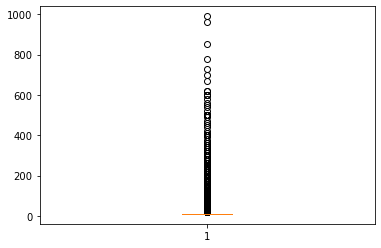

In [21]:
plt.boxplot(order_master.loc[~order_master['dmd_units'].isnull(), 'dmd_units'])

In [22]:
# Considering the number of outliers in the distribution, let's replace the missing values in this column with the median
dmd_units_median = order_master.loc[~order_master['dmd_units'].isnull(), 'dmd_units'].median()
order_master.loc[order_master['dmd_units'].isnull(), 'dmd_units'] = dmd_units_median

The shipping date column is one column that we can get rid of. In context with the problem statement provided, the date element of the order can be captured by the order_date, and hence the shipping date as a variable can be ignored

In [23]:
order_master = order_master.drop('Shp_Date', axis=1)

In the case of missing values in the rtn_units and cncl_units columns, we'll replace the values with 0's if the corresponding revenue values for these columns is 0's, else we'll replace the values with the median units value.

In [24]:
# rtn_units
# Replace rtn_units with 0 if rtn_dol is 0
order_master.loc[(order_master['RTN_UNITS'].isnull()) & (order_master['rtn_dol']==0), 'RTN_UNITS'] = 0
# Replace rest of missing values in rtn_units with median value
rtn_units_median = order_master.loc[~order_master['RTN_UNITS'].isnull(), 'RTN_UNITS'].median()
order_master.loc[order_master['RTN_UNITS'].isnull(), 'RTN_UNITS'] = rtn_units_median


# cncl_units
# Replace cncl_units with 0 if cncl_dol is 0
order_master.loc[(order_master['cncl_units'].isnull()) & (order_master['cncl_dol']==0), 'cncl_units'] = 0
# Replace rest of missing values in cncl_dol with median value
cncl_units_median = order_master.loc[~order_master['cncl_units'].isnull(), 'cncl_units'].median()
order_master.loc[order_master['cncl_units'].isnull(), 'cncl_units'] = cncl_units_median


The missing values in the City column can be imputed using the mode. As for the state and the country column, we can infer both these sets of missing values from the corresponding cities for each of the rows.

However, when we observe the cardinality of these variables, it is extremely high. We can ofcourse perform encoding later such as target encoding or reduce dimensions based on PCA, however, in the interest of time and also taking into account the problem statement, we will drop the city column. Also, we'll imput the state and country values with the mode values

In [25]:
# Dropping the city column
order_master = order_master.drop('City_shipped', axis=1)

# Replacing the Country with the mode = US
order_master.loc[order_master['Cntry_Shipped'].isnull(), 'Cntry_Shipped'] = 'US'

# Replacing the State with the mode state value for the corresponding country
cntry_state_mode = pd.DataFrame(order_master[['Cntry_Shipped', 'State_Shipped']].loc[~(order_master['State_Shipped']).isnull(),:].groupby('Cntry_Shipped')['State_Shipped'].agg(lambda x: pd.Series.mode(x).iat[0])).reset_index()
cntry_state_mode.tail()

tmp = order_master.loc[order_master['State_Shipped'].isnull(), order_master.columns != 'State_Shipped']
tmp2 = pd.merge(tmp, cntry_state_mode, on ='Cntry_Shipped', how = 'left')

order_master = pd.concat([order_master.loc[~order_master['State_Shipped'].isnull(), :], tmp2]).reset_index(drop=True)

#Replacing rest of the missing State values with NA
order_master.loc[order_master['State_Shipped'].isnull(), 'State_Shipped'] = 'NA'

Now that we have treated the missing values in all the columns the orders dataset, let's verify that there are no missing values left.

In [26]:
#checking the percentage of null values in order table columns
order_master.isnull().sum()*100/len(order_master)

ord_num                    0.0
ord_lin_no                 0.0
ord_dt                     0.0
ord_line_status            0.0
ord_hdr_status             0.0
ord_type                   0.0
cncl_dol                   0.0
rtn_dol                    0.0
dmd_dol                    0.0
dmd_units                  0.0
Loyalty_Ind                0.0
Emp_Ind                    0.0
Fship_Ind                  0.0
skn_nbr                    0.0
Subcat_ID                  0.0
Cat_ID                     0.0
Dept_id                    0.0
RTN_UNITS                  0.0
cncl_units                 0.0
international_order_ind    0.0
State_Shipped              0.0
Cntry_Shipped              0.0
dtype: float64

Now, let's have a look at the promos table to understand what kind of data does it consist and if there is any treatment that needs to be performed.

In [27]:
promo_master.head()

,ORDER_NUM,PROMO_CD_1,PROMO_CD_2,PROMO_CD_3,PROMO_CD_4,PROMO_CD_5,PROMO_CD_6,PROMO_CD_7,PROMO_CD_8,PROMO_CD_9,PROMO_CD_10
0,7513817.0,PC_ECOM_CD_2,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1,7658034.0,PC_ECOM_CD_2,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2,8992959.0,PC_ECOM_CD_4,PC_ECOM_CD_1,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,9668876.0,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,7343394.0,NONE,PC_ECOM_CD_1,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [28]:
# Checking if there exist and duplicates in order_id
print("total rows in the data: "+ str(len(promo_master)))
print("distinct orders in the data: "+str(promo_master['ORDER_NUM'].nunique()))

total rows in the data: 2984946
distinct orders in the data: 2984946


From the data, we observe that the columns represent the type of promo applied on each order, and in case no promo is applied, it is represented as NULL. The format of this table can be made a lot more intuitive if we redefine the columns to represent the different types of coupons availbale, and the rows corresponding to each of those columns would be a 1/0 flag indicating whether that specific coupon type was applied on the order or not.

In [29]:
# Collecting the list of all the different coupon types
unique_promos = []
for i in range(len(promo_master.columns)-1):
    unique_promos.extend(list(promo_master.iloc[:, 1+1].unique()))

unique_promos = list(set(unique_promos))
unique_promos.sort()


In [30]:
unique_promos

['NONE',
 'PC_ECOM_CD_1',
 'PC_ECOM_CD_10',
 'PC_ECOM_CD_11',
 'PC_ECOM_CD_12',
 'PC_ECOM_CD_13',
 'PC_ECOM_CD_14',
 'PC_ECOM_CD_15',
 'PC_ECOM_CD_2',
 'PC_ECOM_CD_3',
 'PC_ECOM_CD_4',
 'PC_ECOM_CD_5',
 'PC_ECOM_CD_6',
 'PC_ECOM_CD_7',
 'PC_ECOM_CD_8',
 'PC_ECOM_CD_9']

We'll use the above distinct promo codes as the new set of columns for the promo table

In [31]:
for i in unique_promos:
    promo_master[i] = 0
    promo_master.loc[(promo_master['PROMO_CD_1']==i)| (promo_master['PROMO_CD_2']==i)| (promo_master['PROMO_CD_3']==i)| 
                     (promo_master['PROMO_CD_4']==i)| (promo_master['PROMO_CD_5']==i)| (promo_master['PROMO_CD_6']==i)|
                     (promo_master['PROMO_CD_7']==i)| (promo_master['PROMO_CD_8']==i)| (promo_master['PROMO_CD_9']==i)| 
                     (promo_master['PROMO_CD_10']==i), i] = 1


In [32]:
# Dropping the unnecessary columns from the promo table now 
# We also drop the NONE column as that can be inherently explained by the other columns.
promo_master = promo_master.drop(['PROMO_CD_1', 'PROMO_CD_2', 'PROMO_CD_3', 'PROMO_CD_4', 'PROMO_CD_5', 'PROMO_CD_6', 'PROMO_CD_7', 
                   'PROMO_CD_8', 'PROMO_CD_9', 'PROMO_CD_10', 'NONE'], axis=1)

In [33]:
promo_master.head()

,ORDER_NUM,PC_ECOM_CD_1,PC_ECOM_CD_10,PC_ECOM_CD_11,PC_ECOM_CD_12,PC_ECOM_CD_13,PC_ECOM_CD_14,PC_ECOM_CD_15,PC_ECOM_CD_2,PC_ECOM_CD_3,PC_ECOM_CD_4,PC_ECOM_CD_5,PC_ECOM_CD_6,PC_ECOM_CD_7,PC_ECOM_CD_8,PC_ECOM_CD_9
0,7513817.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,7658034.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,8992959.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,9668876.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7343394.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now that we have completed cleaning the promo and the order table, we'll go ahead and merge these 2 tables at an order level.

In [34]:
order_master = pd.merge(order_master, promo_master, left_on = 'ord_num', right_on = 'ORDER_NUM', how = 'left').reset_index(drop=True)
order_master = order_master.drop('ORDER_NUM', axis=1)
# imputing missing values in the promo code columns with 0s
order_master = order_master.fillna(0)
order_master.head()

,ord_num,ord_lin_no,ord_dt,ord_line_status,ord_hdr_status,ord_type,cncl_dol,rtn_dol,dmd_dol,dmd_units,...,PC_ECOM_CD_14,PC_ECOM_CD_15,PC_ECOM_CD_2,PC_ECOM_CD_3,PC_ECOM_CD_4,PC_ECOM_CD_5,PC_ECOM_CD_6,PC_ECOM_CD_7,PC_ECOM_CD_8,PC_ECOM_CD_9
0,9009772.0,22402482.0,2019-12-01 14:42:08,D,S,MOB,0.0,0.00,559.86,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7343394.0,18785581.0,2019-03-12 17:17:18,D,S,WEB,0.0,0.00,2519.86,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8653822.0,21630678.0,2019-10-26 21:09:37,D,S,MOB,0.0,0.00,5711.86,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9295849.0,23038199.0,2019-12-26 08:00:03,X,X,WEB,46.0,0.00,644.00,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5384524.0,14643824.0,2018-03-27 13:41:35,R,S,WEB,0.0,174.99,2449.86,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This brings us to the end of the data cleaning elements of our code.

#### Deriving new vairables in context of the case study problem

The order_dt timestamp column needs to be treated to convert it into a more machine readable format, as timestamps are not accepted by models. In ouor case, we will use the cyclical encoding method. We know that the temporal components, such as hour, day, month, season all follow a cyclical pattern. As a result, we'll break the timestamp into their corresponding cyclical components.

First, we'll extract the hour, day of week, month of year, and year components from the order column. We'll use cyclical encoding on thes components later in the assignment

In [35]:
order_master['ord_dt'] = pd.to_datetime(order_master['ord_dt'], format='%Y-%m-%d %H:%M:%S')

In [36]:
# Extracting temporal component from ord_dt
order_master['ord_hour'] = order_master['ord_dt'].dt.hour
order_master['ord_dow'] = order_master['ord_dt'].dt.dayofweek
order_master['ord_mnth'] = order_master['ord_dt'].dt.month
order_master['ord_year'] = order_master['ord_dt'].dt.year
order_master['ord_date'] = order_master['ord_dt'].dt.date

In [37]:
order_master.head()

,ord_num,ord_lin_no,ord_dt,ord_line_status,ord_hdr_status,ord_type,cncl_dol,rtn_dol,dmd_dol,dmd_units,...,PC_ECOM_CD_5,PC_ECOM_CD_6,PC_ECOM_CD_7,PC_ECOM_CD_8,PC_ECOM_CD_9,ord_hour,ord_dow,ord_mnth,ord_year,ord_date
0,9009772.0,22402482.0,2019-12-01 14:42:08,D,S,MOB,0.0,0.00,559.86,10.0,...,0.0,0.0,0.0,0.0,0.0,14,6,12,2019,2019-12-01
1,7343394.0,18785581.0,2019-03-12 17:17:18,D,S,WEB,0.0,0.00,2519.86,10.0,...,0.0,0.0,0.0,0.0,0.0,17,1,3,2019,2019-03-12
2,8653822.0,21630678.0,2019-10-26 21:09:37,D,S,MOB,0.0,0.00,5711.86,10.0,...,0.0,0.0,0.0,0.0,0.0,21,5,10,2019,2019-10-26
3,9295849.0,23038199.0,2019-12-26 08:00:03,X,X,WEB,46.0,0.00,644.00,10.0,...,0.0,0.0,0.0,0.0,0.0,8,3,12,2019,2019-12-26
4,5384524.0,14643824.0,2018-03-27 13:41:35,R,S,WEB,0.0,174.99,2449.86,10.0,...,0.0,0.0,0.0,0.0,0.0,13,1,3,2018,2018-03-27


Another useful metric for our analysis would be the average revenue per item per order. We have the total revenue generated per order, we'll divide it with the total items to generate the average revenue per item.

In [38]:
order_master['dmd_dol_per_unit'] = order_master['dmd_dol']/order_master['dmd_units']

Creating a column to check whether a coupon has been used in the order or not

In [39]:
order_master['coupons_used'] = order_master['PC_ECOM_CD_1'] + order_master['PC_ECOM_CD_2'] + order_master['PC_ECOM_CD_3'] + order_master['PC_ECOM_CD_4'] + order_master['PC_ECOM_CD_5'] + order_master['PC_ECOM_CD_6'] + order_master['PC_ECOM_CD_7'] + order_master['PC_ECOM_CD_8'] + order_master['PC_ECOM_CD_9'] + order_master['PC_ECOM_CD_10'] + order_master['PC_ECOM_CD_11'] +  order_master['PC_ECOM_CD_12'] + order_master['PC_ECOM_CD_13'] + order_master['PC_ECOM_CD_14'] + order_master['PC_ECOM_CD_15']

Having cleaned the dataset of most anomalies, and derived new business and data-driven metrics, our next step will be to perform exploratory analysis on the data to unearth some meaningful insights

### Exploratory Data Analysis

According to the case study problem, we're trying to understand the impact of the friendship sale promotion (promo code - PC_ECOM_CD_5). In our data analysis section, we'll focus on understanding and extracting the following insights, split into 3 broad buckets:
1. Overall Orders Exploration:
- Top line Stats: highest revenue generating Country/State, YoY trends
- Average time between shipping and ordering
- Country-wise revenue comparison + US revenue plot
- Temporal Trends
- Analysis of how the Coupon Codes Perform against each other

2. Friendship Sale Promotion Orders:
- Top line stats
- Timeline of revenue, total orders (highlighting sections on the timeline for when sale was run)
- Country-wise revenue comparison + US revenue plot
- Temporal Trends

3. Additional Insights
- Correlation Heatmap to determine effectiveness of friendship sale on revenue


But before we jump into fetching the insights, let's quickly check whether we have any glaring outliers in the numerical variables of our dataset.

In [40]:
# Dividing the column into different types
num_vars = ['cncl_dol', 'rtn_dol', 'dmd_dol', 'dmd_units', 'RTN_UNITS', 'cncl_units', 'dmd_dol_per_unit']
cat_vars = ['ord_line_status', 'ord_hdr_status', 'ord_type', 'Loyalty_Ind', 'Emp_Ind', 'Fship_Ind', 'Subcat_ID', 
            'Cat_ID', 'Dept_id', 'international_order_ind', 'State_Shipped', 'Cntry_Shipped', 'PC_ECOM_CD_1', 'PC_ECOM_CD_10',
            'PC_ECOM_CD_11', 'PC_ECOM_CD_12', 'PC_ECOM_CD_13', 'PC_ECOM_CD_14', 'PC_ECOM_CD_15', 'PC_ECOM_CD_2', 'PC_ECOM_CD_3',
            'PC_ECOM_CD_4', 'PC_ECOM_CD_5', 'PC_ECOM_CD_6', 'PC_ECOM_CD_7', 'PC_ECOM_CD_8', 'PC_ECOM_CD_9']
temporal_vars = ['ord_hour', 'ord_dow', 'ord_mnth', 'ord_year', 'ord_date']
id_vars = ['ord_num', 'ord_lin_no', 'skn_nbr']

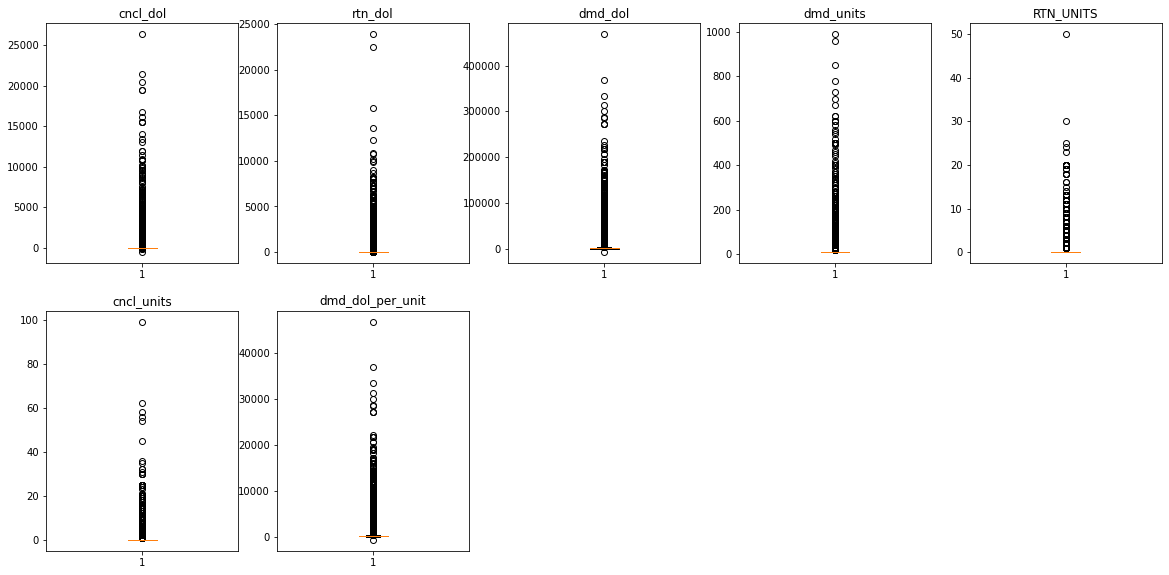

In [41]:
#Plotting boxplots for outlier identification for each variable
plt.figure(figsize=(20,15))

for i in range(len(num_vars)):
    plt.subplot(3,5,i+1)
    plt.boxplot(order_master[num_vars[i]])
    plt.title(num_vars[i])


We observe that there are plenty of outliers in the dataset. These need to be dealt with. However, we will treat these later in the model building phase. During our EDA, there will be analysis on total sales across different periods, and we would not want to eliminate the high sales values in those cases. 

We will now begin with our **segmented-univariate and bi-variate analysis**

#### EDA on the entire dataset

Firstly, let's begin by observing the timeline over the years on how the sales have fluctuated 

In [42]:
total_rev = sum(order_master['dmd_dol'])

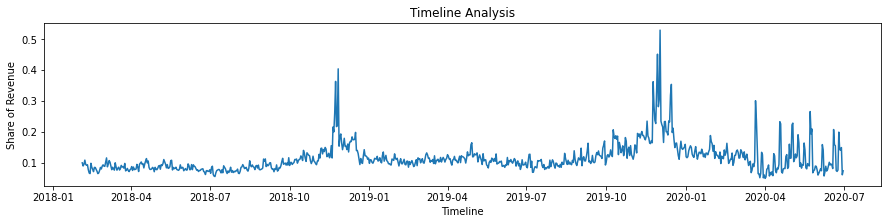

In [43]:
timeline = order_master.groupby(['ord_date'], as_index=False).agg({'dmd_dol':'sum'})
timeline.columns = ['ord_date', 'total_sales']
timeline['share_of_revenue'] = timeline['total_sales']*100/total_rev
timeline = timeline.sort_values(['ord_date'])
plt.figure(figsize=(15, 3))
plt.plot(timeline.ord_date, timeline.share_of_revenue)
plt.xlabel("Timeline")
plt.ylabel("Share of Revenue")
plt.title("Timeline Analysis")
plt.show()

On observing the timeline, we can clearly identify that there is a seasonal trend in the sales data. The holiday periods e.g. during the month of Christmas/New year/Black Friday tends to be the peak time for sales. In order to get a closer look at this, let's break the sales down to a month level. 

Text(0.5, 1.0, 'Month-on-Month Analysis')

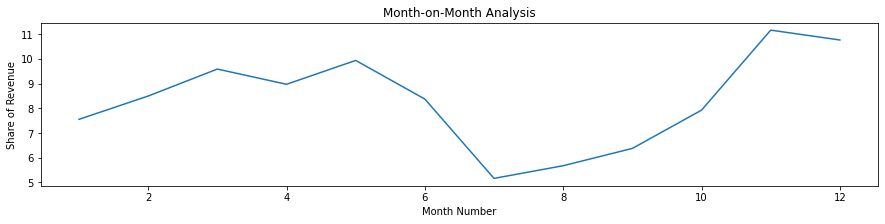

In [44]:
timeline = order_master.groupby(['ord_mnth'], as_index=False).agg({'dmd_dol':'sum'})
timeline.columns = ['ord_mnth', 'total_sales']
timeline['share_of_revenue'] = timeline['total_sales']*100/total_rev
timeline = timeline.sort_values(['ord_mnth'])
plt.figure(figsize=(15, 3))
plt.plot(timeline.ord_mnth, timeline.share_of_revenue)
plt.xlabel("Month Number")
plt.ylabel("Share of Revenue")
plt.title("Month-on-Month Analysis")


The analysis at month level verifies our above statement that suggests the month of Novemember and December (which is usually the holiday season) tend to generate the greatest number of sales

Let's now understand if there is a weekday v. weekend pattern in the sales value

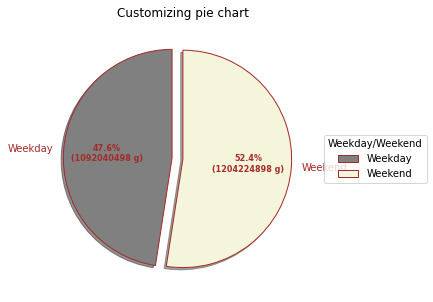

In [45]:
wday_wend = order_master.groupby(['ord_dow'], as_index=False).agg({'dmd_dol':'sum'})
wday_wend.columns = ['ord_dow', 'total_sales']
wday_wend['ord_dow'] = wday_wend['ord_dow'].apply(lambda x: 'Weekend' if x in (5, 6) else 'Weekday')
wday_wend = wday_wend.groupby(['ord_dow'], as_index=False).agg({'total_sales':'mean'})
wday_wend.columns = ['ord_dow', 'average_sales_per_day']

# # Creating plot
# fig = plt.figure(figsize =(5, 5))
# plt.pie(wday_wend['average_sales_per_day'], labels = wday_wend['ord_dow'])

# Creating explode data
explode = (0.1, 0.0)
  
# Creating color parameters
colors = ( "grey", "beige")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "brown" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(5, 5))
wedges, texts, autotexts = ax.pie(wday_wend['average_sales_per_day'], 
                                  autopct = lambda pct: func(pct, wday_wend['average_sales_per_day']),
                                  explode = explode, 
                                  labels = wday_wend['ord_dow'],
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="brown"))
  
# Adding legend
ax.legend(wedges, wday_wend['ord_dow'],
          title ="Weekday/Weekend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")
  
# show plot
plt.show()

We observe that the sales on weekends are sligthly greater than those on the weekdays, however not by a big margin as such.

Next, let's analyze the geographical trends that are exhibited by out dataset. We want to understand what are the highest revenue generating places around the world

In [46]:
# Creating a Function for dynamically creating the Dataframes as per our required variable.
def total_sales(var):
    df = order_master.groupby([var], as_index=False).agg({'dmd_dol':['sum']})
    df.columns = [var,'total_sales']
    df['share_of_revenue'] = df['total_sales']*100/total_rev
    return df.sort_values(by='total_sales', ascending = False).head(10)

<AxesSubplot:xlabel='Cntry_Shipped', ylabel='share_of_revenue'>

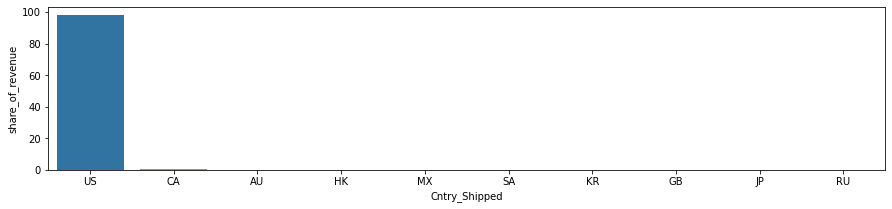

In [47]:
# Topline stats
# Revenue generated by Country
total_sales_cntry = total_sales('Cntry_Shipped')
plt.figure(figsize=(15, 3))
sns.barplot(total_sales_cntry.Cntry_Shipped, total_sales_cntry.share_of_revenue)

We observe that over 90% of the total sales are ordered from the US. In order to delve further into the US, let's have a look at what states are generating the greatest number of sales

<AxesSubplot:xlabel='State_Shipped', ylabel='share_of_revenue'>

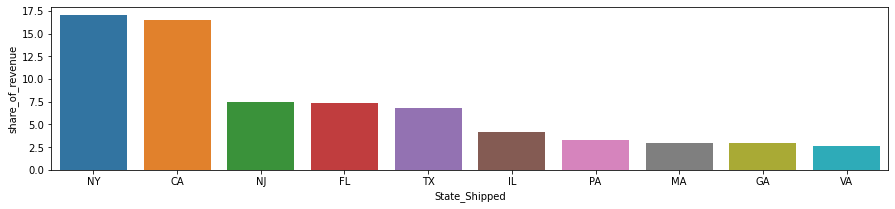

In [48]:
# Topline stats
# Revenue generated by Country
total_sales_cntry = total_sales('State_Shipped')
plt.figure(figsize=(15, 3))
sns.barplot(total_sales_cntry.State_Shipped, total_sales_cntry.share_of_revenue)

The states of New York and California generate the greatest amount of revenue

We can also analyze the revenue generated by the different product categories and sub-categories. However, we don't really have a lookup for these categories, and as a result, the analysis that we provide would not converted into something actionable or informative. As a result as part of this assignment, we'll skip the product level analysis

Now, let's come to the **coupon code analysis.**

Let's check the usage of each of the coupon codes to understand which codes are used most frequently by the users

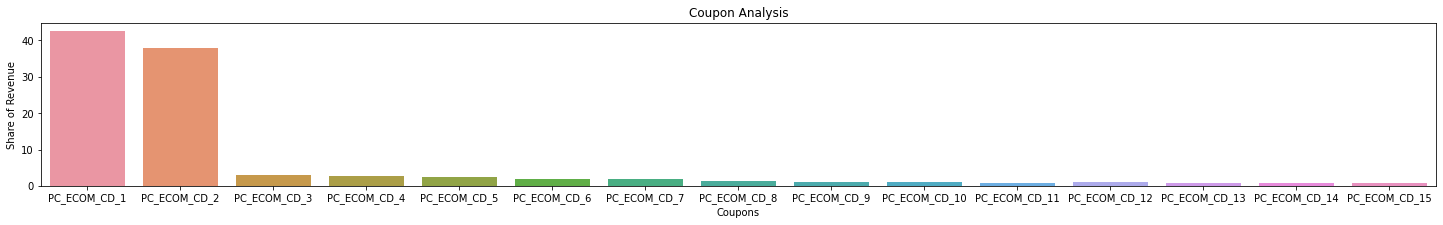

In [49]:
coupon_ls = ['PC_ECOM_CD_1', 'PC_ECOM_CD_2', 'PC_ECOM_CD_3', 'PC_ECOM_CD_4', 'PC_ECOM_CD_5', 'PC_ECOM_CD_6', 'PC_ECOM_CD_7',
             'PC_ECOM_CD_8', 'PC_ECOM_CD_9', 'PC_ECOM_CD_10', 'PC_ECOM_CD_11', 'PC_ECOM_CD_12', 'PC_ECOM_CD_13', 'PC_ECOM_CD_14',
             'PC_ECOM_CD_15']
coupon_cnt = []

for i in coupon_ls:
    coupon_cnt.append(order_master[i].sum())
    
coupon_usage = pd.DataFrame({'Coupon Code': coupon_ls, 'Coupon Usage': coupon_cnt})

# Create a dummy df with the required list and the col name to sort on
coupon_usage2 = pd.Series(coupon_ls, name = 'Coupon Code').to_frame()

# Use left merge on the dummy to return a sorted df
coupon_usage2 = pd.merge(coupon_usage2, coupon_usage, on = 'Coupon Code', how = 'left')

total_usage = sum(coupon_usage['Coupon Usage'])
coupon_usage2['Coupon Usage'] = coupon_usage2['Coupon Usage']*100/total_usage
plt.figure(figsize=(25, 3))
sns.barplot(coupon_usage2['Coupon Code'], coupon_usage2['Coupon Usage'])
plt.xlabel("Coupons")
plt.ylabel("Share of Revenue")
plt.title("Coupon Analysis")
plt.show()

From the above analysis, we observe that the the PC_ECOM_CD1 & PC_ECOM_CD_2 are by far the most used coupons on the website. The coupon that we're interested in i.e. the friendship day sale coupon (PC_ECOM_CD_5) is the 5th most used coupon.

Let's have a look at the revenue impact that these coupon codes have had.

In this case, we will derive 2 new metrics:
- revenue generation rate: the amount of revenue generated/no. of days the promo ran for.
- Coupon usage rate: no. of coupons used/no. of dats the promo ran for.

This will give an indication of how effective the campaign was. The reason for using this metric is because different campaigns ran over different periods of time. Hence this metric will allow us to compare the effectiveness of each campaign.

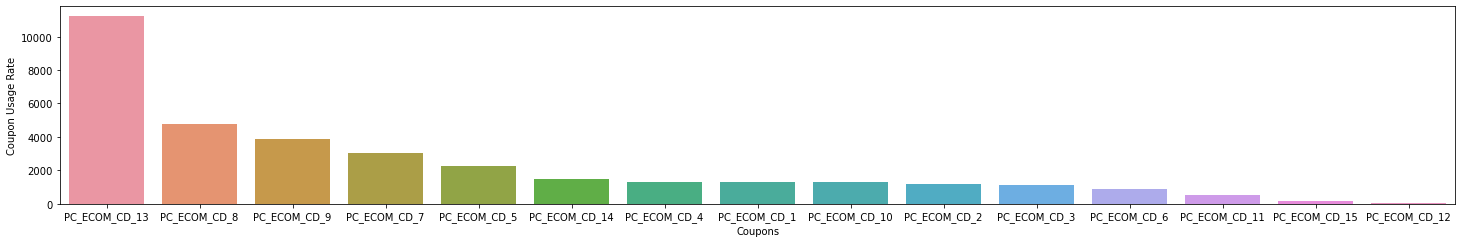

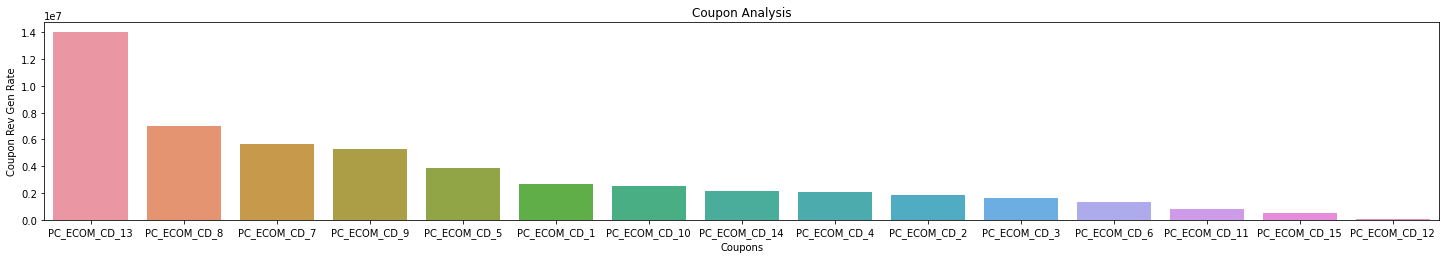

In [50]:
coupon_ls = ['PC_ECOM_CD_1', 'PC_ECOM_CD_2', 'PC_ECOM_CD_3', 'PC_ECOM_CD_4', 'PC_ECOM_CD_5', 'PC_ECOM_CD_6', 'PC_ECOM_CD_7',
             'PC_ECOM_CD_8', 'PC_ECOM_CD_9', 'PC_ECOM_CD_10', 'PC_ECOM_CD_11', 'PC_ECOM_CD_12', 'PC_ECOM_CD_13', 'PC_ECOM_CD_14',
             'PC_ECOM_CD_15']
coupon_cnt = []
coupon_rev = []
coupon_dt = []

for i in coupon_ls:
    coupon_cnt.append(order_master[i].sum())
    coupon_rev.append(order_master.loc[order_master[i]==1, 'dmd_dol'].sum())
    coupon_dt.append(order_master.loc[order_master[i]==1, 'ord_date'].nunique())
    
coupon_usage = pd.DataFrame({'Coupon Code': coupon_ls, 'Coupons Used': coupon_cnt, 'Sales': coupon_rev, 'Coupon Period': coupon_dt})

# Create a dummy df with the required list and the col name to sort on
coupon_usage2 = pd.Series(coupon_ls, name = 'Coupon Code').to_frame()

# Use left merge on the dummy to return a sorted df
coupon_usage = pd.merge(coupon_usage2, coupon_usage, on = 'Coupon Code', how = 'left')

# Deriving the new metrics
coupon_usage['Coupon Usage Rate'] = coupon_usage['Coupons Used']/coupon_usage['Coupon Period']
coupon_usage['Coupon Rev Gen Rate'] = coupon_usage['Sales']/coupon_usage['Coupon Period']

coupon_usage

tmp1 = coupon_usage.sort_values('Coupon Usage Rate', ascending=False)
tmp2 = coupon_usage.sort_values('Coupon Rev Gen Rate', ascending=False)

plt.figure(figsize=(25, 8))
plt.subplot(2,1,1)
sns.barplot(tmp1['Coupon Code'], tmp1['Coupon Usage Rate'])
plt.xlabel("Coupons")
plt.ylabel("Coupon Usage Rate")

plt.figure(figsize=(25, 8))
plt.subplot(2,1,1)
sns.barplot(tmp2['Coupon Code'], tmp2['Coupon Rev Gen Rate'])
plt.xlabel("Coupons")
plt.ylabel("Coupon Rev Gen Rate")

plt.title("Coupon Analysis")
plt.show()

The above analysis, however, prints a different picture on the impact of the promo campaign. The impact that the friendship promo campaign has had compared to other coupons is quite significant, and it stands 5th on the list.

Now, let's delve into the coupon code that we're interested in: the Friendship Sale Promotion

#### EDA on the dataset filtered for the order using the Friendship Sale Promotion Code

In [51]:
friendship_master = order_master.loc[order_master['PC_ECOM_CD_5']==1, :].reset_index(drop=True)
friendship_master.head()

,ord_num,ord_lin_no,ord_dt,ord_line_status,ord_hdr_status,ord_type,cncl_dol,rtn_dol,dmd_dol,dmd_units,...,PC_ECOM_CD_7,PC_ECOM_CD_8,PC_ECOM_CD_9,ord_hour,ord_dow,ord_mnth,ord_year,ord_date,dmd_dol_per_unit,coupons_used
0,6834991.0,17723704.0,2018-12-16 15:18:53,D,S,WEB,0.00,0.0,4199.86,10.0,...,0.0,0.0,0.0,15,6,12,2018,2018-12-16,419.986,2.0
1,6819044.0,17689222.0,2018-12-14 22:45:30,D,S,WEB,0.00,0.0,839.86,10.0,...,0.0,0.0,0.0,22,4,12,2018,2018-12-14,83.986,1.0
2,9867652.0,24208598.0,2020-03-21 19:21:31,D,S,WEB,0.00,0.0,188.86,10.0,...,0.0,0.0,0.0,19,5,3,2020,2020-03-21,18.886,1.0
3,8430663.0,21171646.0,2019-09-23 00:36:01,D,S,MOB,0.00,0.0,2099.86,10.0,...,0.0,0.0,0.0,0,0,9,2019,2019-09-23,209.986,1.0
4,9885109.0,24257295.0,2020-03-23 12:57:31,X,X,WEB,37.49,0.0,524.86,10.0,...,0.0,0.0,0.0,12,0,3,2020,2020-03-23,52.486,2.0


In [52]:
friendship_master.shape

(69795, 44)

Let's try to extract some insights around how, when and where are the users using this specific code.

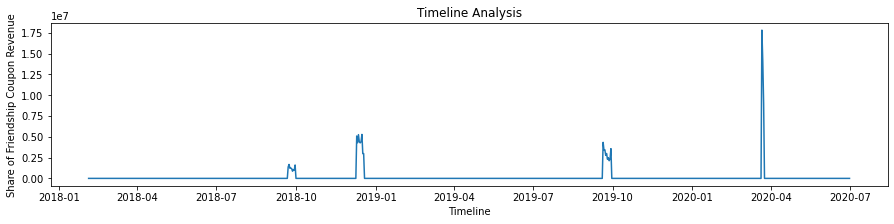

In [53]:
# Identifying the revenue generated by orders using this coupon
timeline = order_master[['ord_date', 'PC_ECOM_CD_5', 'dmd_dol']].copy()
timeline['friendship_coupon_revenue'] = timeline['PC_ECOM_CD_5'] * timeline['dmd_dol']

timeline = timeline.groupby(['ord_date'], as_index=False).agg({'friendship_coupon_revenue':'sum'})
timeline.columns = ['ord_date', 'friendship_coupon_revenue']
total_frndshp_rev = sum(timeline['friendship_coupon_revenue'])
timeline['share_of_coupon_revenue'] = timeline['friendship_coupon_revenue']*100/total_frndshp_rev
timeline = timeline.sort_values(['ord_date'])

plt.figure(figsize=(15, 3))
plt.plot(timeline.ord_date, timeline.friendship_coupon_revenue)
plt.xlabel("Timeline")
plt.ylabel("Share of Friendship Coupon Revenue")
plt.title("Timeline Analysis")
plt.show()


From the timeline, we observe that the friendship coupon over the years was used during only certain portions of the timeline. The greatest share of revenue generated, however, was the burst of March 2020.

In our problem statement, we specifically want to see how effective the friendship campaign of March 2020 was. As a result, let's isolate the campaign for this specific month, and then test out the 2 derived impact metrics that we discussed previously to understand where on the list of importance does this coupon fall.

In [54]:
# First, let's create a new column to capture the friendship promo data for just the month of March 2020

order_master['PC_ECOM_CD_5_MAR20'] = 0
order_master.loc[(order_master['PC_ECOM_CD_5']==1)&(order_master['ord_mnth']==3)&(order_master['ord_year']==2020), 'PC_ECOM_CD_5_MAR20'] = 1

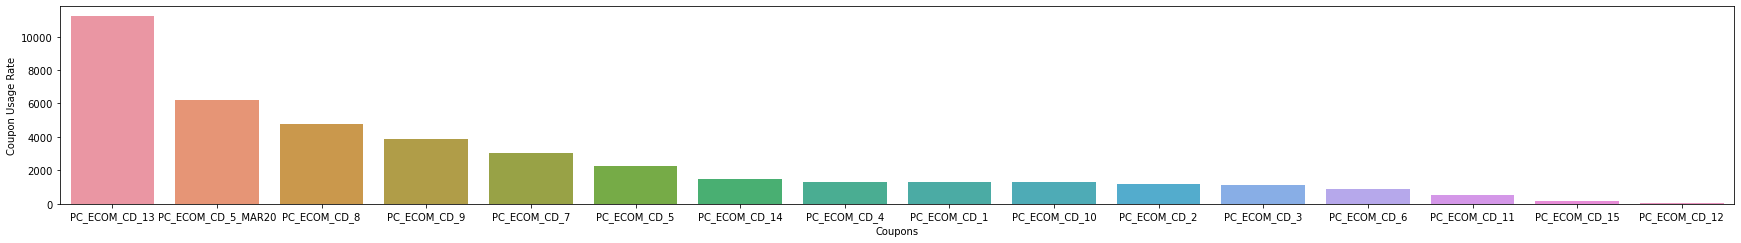

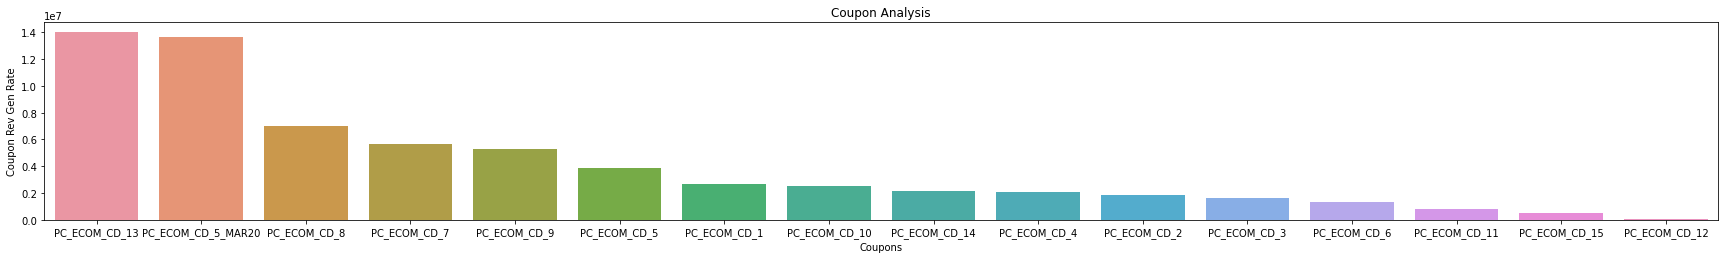

In [55]:
coupon_ls = ['PC_ECOM_CD_1', 'PC_ECOM_CD_2', 'PC_ECOM_CD_3', 'PC_ECOM_CD_4', 'PC_ECOM_CD_5', 'PC_ECOM_CD_6', 'PC_ECOM_CD_7',
             'PC_ECOM_CD_8', 'PC_ECOM_CD_9', 'PC_ECOM_CD_10', 'PC_ECOM_CD_11', 'PC_ECOM_CD_12', 'PC_ECOM_CD_13', 'PC_ECOM_CD_14',
             'PC_ECOM_CD_15', 'PC_ECOM_CD_5_MAR20']
coupon_cnt = []
coupon_rev = []
coupon_dt = []

for i in coupon_ls:
    coupon_cnt.append(order_master[i].sum())
    coupon_rev.append(order_master.loc[order_master[i]==1, 'dmd_dol'].sum())
    coupon_dt.append(order_master.loc[order_master[i]==1, 'ord_date'].nunique())
    
coupon_usage = pd.DataFrame({'Coupon Code': coupon_ls, 'Coupons Used': coupon_cnt, 'Sales': coupon_rev, 'Coupon Period': coupon_dt})

# Create a dummy df with the required list and the col name to sort on
coupon_usage2 = pd.Series(coupon_ls, name = 'Coupon Code').to_frame()

# Use left merge on the dummy to return a sorted df
coupon_usage = pd.merge(coupon_usage2, coupon_usage, on = 'Coupon Code', how = 'left')

# Deriving the new metrics
coupon_usage['Coupon Usage Rate'] = coupon_usage['Coupons Used']/coupon_usage['Coupon Period']
coupon_usage['Coupon Rev Gen Rate'] = coupon_usage['Sales']/coupon_usage['Coupon Period']

coupon_usage

tmp1 = coupon_usage.sort_values('Coupon Usage Rate', ascending=False)
tmp2 = coupon_usage.sort_values('Coupon Rev Gen Rate', ascending=False)

plt.figure(figsize=(30, 8))
plt.subplot(2,1,1)
sns.barplot(tmp1['Coupon Code'], tmp1['Coupon Usage Rate'])
plt.xlabel("Coupons")
plt.ylabel("Coupon Usage Rate")

plt.figure(figsize=(30, 8))
plt.subplot(2,1,1)
sns.barplot(tmp2['Coupon Code'], tmp2['Coupon Rev Gen Rate'])
plt.xlabel("Coupons")
plt.ylabel("Coupon Rev Gen Rate")

plt.title("Coupon Analysis")
plt.show()

The impact of our friendship campaign in the month of Mar 2020 is now even more glaring!! In terms of both the revenue generation rate and the coupon usage rate, the friendship sale promo code for Mar 2020 is second on the list!!

Finally, another important computation is to check whether we were able to drive any incremental sales.

In order to compute incremental sales: we'll use the following formula:

`Incremental Sales = New Sales - Baseline Sales`

`Incremental Sales Uplift = (New Sales - Baseline Sales) / Baseline Sales`

Where, `New Sales` = Sales after promo code and `Baseline Sales` = Sales without any promo code

Since we need to ensure that the period over which these 2 sales values should be consistent, we will use the revenue generation rate metric instead of the sales metric to compute the incremental sales


In [56]:
coupon_ls = ['BASELINE', 'PC_ECOM_CD_5_MAR20']
coupon_cnt = []
coupon_rev = []
coupon_dt = []

coupon_rev.append(order_master.loc[order_master['coupons_used']==0, 'dmd_dol'].sum())
coupon_dt.append(order_master.loc[order_master['coupons_used']==0, 'ord_date'].nunique())

coupon_rev.append(order_master.loc[order_master['PC_ECOM_CD_5_MAR20']==1, 'dmd_dol'].sum())
coupon_dt.append(order_master.loc[order_master['PC_ECOM_CD_5_MAR20']==1, 'ord_date'].nunique())

coupon_usage = pd.DataFrame({'Coupon Code': coupon_ls, 'Sales': coupon_rev, 'Coupon Period': coupon_dt})

# Create a dummy df with the required list and the col name to sort on
coupon_usage2 = pd.Series(coupon_ls, name = 'Coupon Code').to_frame()

# Use left merge on the dummy to return a sorted df
coupon_usage = pd.merge(coupon_usage2, coupon_usage, on = 'Coupon Code', how = 'left')

coupon_usage['Coupon Rev Gen Rate'] = coupon_usage['Sales']/coupon_usage['Coupon Period']

coupon_usage

,Coupon Code,Sales,Coupon Period,Coupon Rev Gen Rate
0,BASELINE,3.580293e+09,878,4.077782e+06
1,PC_ECOM_CD_5_MAR20,4.093104e+07,3,1.364368e+07


Computing the Incremental Sales Uplift for the Friendship Sale Campaign that ran in Mar20 compared to baseline sales:

In [57]:
baseline_sales = coupon_usage.loc[coupon_usage['Coupon Code']=='BASELINE', "Coupon Rev Gen Rate"].reset_index(drop=True)[0]
new_sales = coupon_usage.loc[coupon_usage['Coupon Code']=='PC_ECOM_CD_5_MAR20', "Coupon Rev Gen Rate"].reset_index(drop=True)[0]

incremental_sales_uplift = (new_sales - baseline_sales)*100 / baseline_sales
round(incremental_sales_uplift, 0)

235.0

**We observe that the friendship promo campaign that ran in March 20 has an incremental uplift of 235% over the baseline sales!!!**

With the above analysis, we are able to really quantify the kind of impact that our campaign has had!

With this, we can conclude the exploratory data analysis section, and proceed to the model building phase. Before proceeding to the model building phase, there are some final steps of data preparation that we need to take into account

### Preparing the data for modeling

In [58]:
# Dividing the column into different types
num_vars = ['cncl_dol', 'rtn_dol', 'dmd_dol', 'dmd_units', 'RTN_UNITS', 'cncl_units', 'dmd_dol_per_unit', 'coupons_used']

cat_vars = ['ord_line_status', 'ord_hdr_status', 'ord_type', 'Loyalty_Ind', 'Emp_Ind', 'Fship_Ind', 'Subcat_ID', 
            'Cat_ID', 'Dept_id', 'international_order_ind', 'State_Shipped', 'Cntry_Shipped', 'PC_ECOM_CD_1', 'PC_ECOM_CD_10',
            'PC_ECOM_CD_11', 'PC_ECOM_CD_12', 'PC_ECOM_CD_13', 'PC_ECOM_CD_14', 'PC_ECOM_CD_15', 'PC_ECOM_CD_2', 'PC_ECOM_CD_3',
            'PC_ECOM_CD_4', 'PC_ECOM_CD_5', 'PC_ECOM_CD_6', 'PC_ECOM_CD_7', 'PC_ECOM_CD_8', 'PC_ECOM_CD_9', 
            'PC_ECOM_CD_5_MAR20']

temporal_vars = ['ord_hour', 'ord_dow', 'ord_mnth', 'ord_year', 'ord_date']

id_vars = ['ord_num', 'ord_lin_no', 'skn_nbr']

In [59]:
order_master.head()

,ord_num,ord_lin_no,ord_dt,ord_line_status,ord_hdr_status,ord_type,cncl_dol,rtn_dol,dmd_dol,dmd_units,...,PC_ECOM_CD_8,PC_ECOM_CD_9,ord_hour,ord_dow,ord_mnth,ord_year,ord_date,dmd_dol_per_unit,coupons_used,PC_ECOM_CD_5_MAR20
0,9009772.0,22402482.0,2019-12-01 14:42:08,D,S,MOB,0.0,0.00,559.86,10.0,...,0.0,0.0,14,6,12,2019,2019-12-01,55.986,0.0,0
1,7343394.0,18785581.0,2019-03-12 17:17:18,D,S,WEB,0.0,0.00,2519.86,10.0,...,0.0,0.0,17,1,3,2019,2019-03-12,251.986,1.0,0
2,8653822.0,21630678.0,2019-10-26 21:09:37,D,S,MOB,0.0,0.00,5711.86,10.0,...,0.0,0.0,21,5,10,2019,2019-10-26,571.186,0.0,0
3,9295849.0,23038199.0,2019-12-26 08:00:03,X,X,WEB,46.0,0.00,644.00,10.0,...,0.0,0.0,8,3,12,2019,2019-12-26,64.400,0.0,0
4,5384524.0,14643824.0,2018-03-27 13:41:35,R,S,WEB,0.0,174.99,2449.86,10.0,...,0.0,0.0,13,1,3,2018,2018-03-27,244.986,0.0,0


In [60]:
order_master.columns

Index(['ord_num', 'ord_lin_no', 'ord_dt', 'ord_line_status', 'ord_hdr_status',
       'ord_type', 'cncl_dol', 'rtn_dol', 'dmd_dol', 'dmd_units',
       'Loyalty_Ind', 'Emp_Ind', 'Fship_Ind', 'skn_nbr', 'Subcat_ID', 'Cat_ID',
       'Dept_id', 'RTN_UNITS', 'cncl_units', 'international_order_ind',
       'State_Shipped', 'Cntry_Shipped', 'PC_ECOM_CD_1', 'PC_ECOM_CD_10',
       'PC_ECOM_CD_11', 'PC_ECOM_CD_12', 'PC_ECOM_CD_13', 'PC_ECOM_CD_14',
       'PC_ECOM_CD_15', 'PC_ECOM_CD_2', 'PC_ECOM_CD_3', 'PC_ECOM_CD_4',
       'PC_ECOM_CD_5', 'PC_ECOM_CD_6', 'PC_ECOM_CD_7', 'PC_ECOM_CD_8',
       'PC_ECOM_CD_9', 'ord_hour', 'ord_dow', 'ord_mnth', 'ord_year',
       'ord_date', 'dmd_dol_per_unit', 'coupons_used', 'PC_ECOM_CD_5_MAR20'],
      dtype='object')

Firstly, we need to get rid of the outliers that exist in the numerical variables that we observed during our EDA. We'll eliminate all the rows that have numerical variables above the 95th percentile of their distribution

In [61]:
# Outlier Treatment
outlier_index = order_master.loc[(order_master['cncl_dol']>order_master['cncl_dol'].quantile(0.95))&
                                      (order_master['cncl_dol']>order_master['cncl_dol'].quantile(0.95))&
                                      (order_master['cncl_dol']>order_master['cncl_dol'].quantile(0.95))&
                                      (order_master['cncl_dol']>order_master['cncl_dol'].quantile(0.95))&
                                      (order_master['cncl_dol']>order_master['cncl_dol'].quantile(0.95))&
                                      (order_master['cncl_dol']>order_master['cncl_dol'].quantile(0.95))&
                                      (order_master['cncl_dol']>order_master['cncl_dol'].quantile(0.95)),:].index

order_master_final = order_master.drop(outlier_index).reset_index(drop=True)


Now, let's look at the temporal related variables. As mentioned previously, variables like hour, dayofweek and month follow a cyclical pattern, and hence we will encode them in that fashion. Let's replace eacch of these 3 variables with their correesponding sine and cosine values

In [62]:
# Cyclical encoding of hour variable
order_master_final['ord_hour_sin'] = np.sin(order_master_final['ord_hour']*(2.*np.pi/23))
order_master_final['ord_hour_cos'] = np.cos(order_master_final['ord_hour']*(2.*np.pi/23))

# Cyclical encoding of dow variable
order_master_final['ord_dow_sin'] = np.sin(order_master_final['ord_dow']*(2.*np.pi/6))
order_master_final['ord_dow_cos'] = np.cos(order_master_final['ord_dow']*(2.*np.pi/6))

# Cyclical encoding of mnth variable
order_master_final['ord_mnth_sin'] = np.sin(order_master_final['ord_mnth']*(2.*np.pi/12))
order_master_final['ord_mnth_cos'] = np.cos(order_master_final['ord_mnth']*(2.*np.pi/12))


Now, let's have a look at all the categorical variables in our dataset

In [63]:
for i in cat_vars:
    print(order_master_final[i].value_counts())

D     3572203
R      848068
X       22110
P        9377
G         178
S         171
HY         79
O          66
U          28
HC         22
HB          6
HR          4
L           4
W           3
Name: ord_line_status, dtype: int64
S    4436934
X      15375
J         10
Name: ord_hdr_status, dtype: int64
WEB    2974237
MOB    1330466
TEL     147616
Name: ord_type, dtype: int64
0.0    4024151
1.0     428168
Name: Loyalty_Ind, dtype: int64
0.0    4419948
1.0      32371
Name: Emp_Ind, dtype: int64
0.0    4452319
Name: Fship_Ind, dtype: int64
903.0    321678
956.0    278233
934.0    255081
968.0    170561
907.0    151733
          ...  
927.0        45
849.0         9
851.0         6
973.0         4
853.0         3
Name: Subcat_ID, Length: 88, dtype: int64
46.0    1206533
47.0    1034637
48.0     925232
49.0     620788
76.0     217750
44.0     154722
45.0     143991
78.0      80489
77.0      41678
79.0      15419
75.0       8905
94.0       2098
73.0         77
Name: Cat_ID, dtype: int64
4.

In [64]:
# Dummy Encoding the relevant categorical variables

# The ord_line_status variable
ord_line_status_levels = pd.get_dummies(order_master_final['ord_line_status'])
col_ls = []
for i in range(len(ord_line_status_levels.columns)):
    col_ls.append(str("ord_line_status_")+str(ord_line_status_levels.columns[i]))
ord_line_status_levels.columns = col_ls
order_master_final = pd.concat([order_master_final, ord_line_status_levels], axis = 1)


# The ord_line_status variable
dummy_levels = pd.get_dummies(order_master_final['ord_hdr_status'])
col_ls = []
for i in range(len(dummy_levels.columns)):
    col_ls.append(str("ord_hdr_status_")+str(dummy_levels.columns[i]))
dummy_levels.columns = col_ls
order_master_final = pd.concat([order_master_final, dummy_levels], axis = 1)

# The ord_type variable
dummy_levels = pd.get_dummies(order_master_final['ord_type'])
col_ls = []
for i in range(len(dummy_levels.columns)):
    col_ls.append(str("ord_type_")+str(dummy_levels.columns[i]))
dummy_levels.columns = col_ls
order_master_final = pd.concat([order_master_final, dummy_levels], axis = 1)


# The Cat_ID variable
dummy_levels = pd.get_dummies(order_master_final['Cat_ID'])
col_ls = []
for i in range(len(dummy_levels.columns)):
    col_ls.append(str("Cat_ID_")+str(dummy_levels.columns[i]))    
dummy_levels.columns = col_ls
order_master_final = pd.concat([order_master_final, dummy_levels], axis = 1)

# The ord_year variable
dummy_levels = pd.get_dummies(order_master_final['ord_year'])
col_ls = []
for i in range(len(dummy_levels.columns)):
    col_ls.append(str("ord_year_")+str(dummy_levels.columns[i]))    
dummy_levels.columns = col_ls
order_master_final = pd.concat([order_master_final, dummy_levels], axis = 1)


In [65]:
# Binary encoding for categories with just 2 levels of data
# The Dept_id variable
order_master_final.loc[order_master_final['Dept_id']==4.0, 'Dept_id'] = 0
order_master_final.loc[order_master_final['Dept_id']==9.0, 'Dept_id'] = 1

# The Dept_id variable
order_master_final.loc[order_master_final['international_order_ind']=='F', 'international_order_ind'] = 0
order_master_final.loc[order_master_final['international_order_ind']=='T', 'international_order_ind'] = 1

We're now left with categorical variables that have very high cardinality: 'Subcat_ID', 'State_Shipped', 'Cntry_Shipped'.

As for the country column, we've seen that it is massivley skewed towards the US, and hence we will go ahead and drop the column. Also, we make the decision to drop the Subcat_ID column as we're capturing an upper level of this variable using the Cat Id and the problem we're working towards is more concerned about the impact of the promo code.

We could train a model while including these variables using other encoding methods too, but we'll skip them for now.

As for the State_Shipped column, this seems relevant as there is no massive one-sided skew like the country column. But die to the very high cardinality in this column, we will perform target encoding here to deal with this

In [66]:
# Target Encoding for State_Shipped column
# Here, we will replace the values for the different states with the median value for sales

state_enc = pd.DataFrame(order_master_final.groupby('State_Shipped')['dmd_dol'].median()).reset_index()
state_enc.columns = ['State_Shipped', 'State_Shipped_Encoded']

order_master_final = pd.merge(order_master_final, state_enc, on = 'State_Shipped', how = 'left')

Finally, let's drop all the unnecessary columns from our datarfame

In [67]:
order_master_final = order_master_final.drop(['ord_lin_no', 'ord_dt', 'Fship_Ind', 'skn_nbr', 'Subcat_ID', 'State_Shipped', 
                                              'Cntry_Shipped', 'ord_hour', 'ord_dow', 'ord_mnth', 'ord_year', 'ord_date', 
                                              'ord_line_status', 'ord_hdr_status', 'ord_type', 'Cat_ID'], axis = 1)

In [68]:
order_master_final.head()

,ord_num,cncl_dol,rtn_dol,dmd_dol,dmd_units,Loyalty_Ind,Emp_Ind,Dept_id,RTN_UNITS,cncl_units,...,Cat_ID_75.0,Cat_ID_76.0,Cat_ID_77.0,Cat_ID_78.0,Cat_ID_79.0,Cat_ID_94.0,ord_year_2018,ord_year_2019,ord_year_2020,State_Shipped_Encoded
0,9009772.0,0.0,0.00,559.86,10.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,979.86
1,7343394.0,0.0,0.00,2519.86,10.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1075.06
2,8653822.0,0.0,0.00,5711.86,10.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1111.95
3,5384524.0,0.0,174.99,2449.86,10.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,1049.86
4,6393955.0,0.0,34.99,489.86,10.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,1119.72


Our dataset has now been more or less prepared for model creation purpose. Before proceeding with model building, let's check whether there exist any multicollinearity in the numerical variables in our dataset

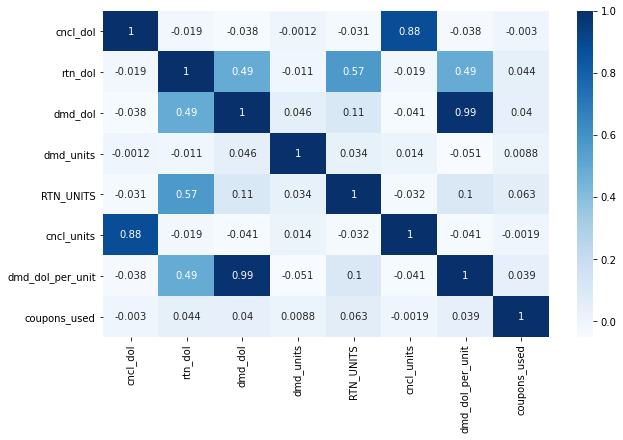

In [69]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,6))        # Size of the figure
sns.heatmap(order_master_final[num_vars].corr(),annot = True, cmap="Blues")
plt.show()

On observing the correlation heatmap, we see that the dmd_dol_per_unit column is almost entirely correlated with the dmd_dol column. This is expected as the column was derived from the dmd_dol column itself. In our case, we will do away with this column from our dataset so that we can capture the true importance of the other columns.

In [70]:
order_master_final = order_master_final.drop('dmd_dol_per_unit', axis=1)

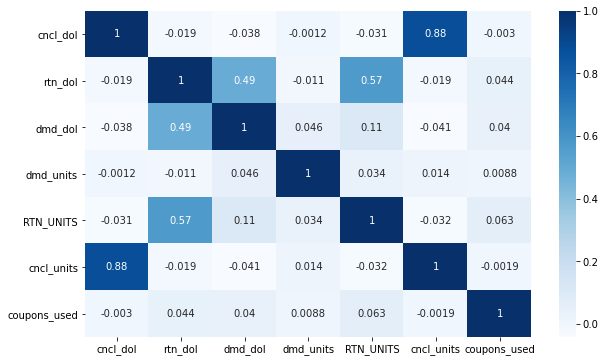

In [71]:
num_vars.remove('dmd_dol_per_unit')

# Let's see the correlation matrix 
plt.figure(figsize = (10,6))        # Size of the figure
sns.heatmap(order_master_final[num_vars].corr(),annot = True, cmap="Blues")
plt.show()

We do observe some correlation between the cncl_units and cncl_dol. We can eliminate one of these columns too. As of now, however, we will let it remain in the dataset. We can let the VIF values to decide whether to eliminate these variables or not later in the model building phase.

In [73]:
# Ensuring all the columns are of data type int
s = order_master_final.select_dtypes(include='object').columns
order_master_final[s] = order_master_final[s].astype("float")

#### Splitting the data into test and train

In [74]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(1)
df_train, df_test = train_test_split(order_master_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [75]:
print(df_train.shape)
print(df_test.shape)

(3116623, 71)
(1335696, 71)


**Rescaling of features**<br>

We now go ahead with rescaling of features which will help serve the following purpose: all the variables will have a comparable scale, and hence the gradient descent procedure for the model will be a lot more optimized.<br>

There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation

We will use MinMax scaling as this will not change the distribution of any variable (won't make the mean to become 0 and standard deviation to become 1) <br>

Note - this will be performed independently on the train set i.e. separate from the test set


In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler = MinMaxScaler()

In [78]:
# Apply scaler() to all the columns except the 'categorical variables variables
num_vars.remove("dmd_dol")
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [79]:
df_train.head()

,ord_num,cncl_dol,rtn_dol,dmd_dol,dmd_units,Loyalty_Ind,Emp_Ind,Dept_id,RTN_UNITS,cncl_units,...,Cat_ID_75.0,Cat_ID_76.0,Cat_ID_77.0,Cat_ID_78.0,Cat_ID_79.0,Cat_ID_94.0,ord_year_2018,ord_year_2019,ord_year_2020,State_Shipped_Encoded
9986,5256968.0,0.945174,0.000000,699.86,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,1049.86
1215624,6675547.0,0.945174,0.037499,5711.86,0.0,0.0,0.0,0.0,0.033333,0.0,...,0,0,0,0,0,0,1,0,0,1007.86
872149,7263125.0,0.945174,0.000000,1119.86,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,1119.58
1583403,8099418.0,0.945174,0.000000,6652.66,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,1049.86
1582408,5493584.0,0.945174,0.000000,629.86,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,1119.58


--------

### Model Building

#### 1. Linear Regression Model

First, we'll begin with the base model i.e. including all the existing variables. Let's see how well our model performs

In [80]:
df_train.columns

Index(['ord_num', 'cncl_dol', 'rtn_dol', 'dmd_dol', 'dmd_units', 'Loyalty_Ind',
       'Emp_Ind', 'Dept_id', 'RTN_UNITS', 'cncl_units',
       'international_order_ind', 'PC_ECOM_CD_1', 'PC_ECOM_CD_10',
       'PC_ECOM_CD_11', 'PC_ECOM_CD_12', 'PC_ECOM_CD_13', 'PC_ECOM_CD_14',
       'PC_ECOM_CD_15', 'PC_ECOM_CD_2', 'PC_ECOM_CD_3', 'PC_ECOM_CD_4',
       'PC_ECOM_CD_5', 'PC_ECOM_CD_6', 'PC_ECOM_CD_7', 'PC_ECOM_CD_8',
       'PC_ECOM_CD_9', 'coupons_used', 'PC_ECOM_CD_5_MAR20', 'ord_hour_sin',
       'ord_hour_cos', 'ord_dow_sin', 'ord_dow_cos', 'ord_mnth_sin',
       'ord_mnth_cos', 'ord_line_status_D', 'ord_line_status_G',
       'ord_line_status_HB', 'ord_line_status_HC', 'ord_line_status_HR',
       'ord_line_status_HY', 'ord_line_status_L', 'ord_line_status_O',
       'ord_line_status_P', 'ord_line_status_R', 'ord_line_status_S',
       'ord_line_status_U', 'ord_line_status_W', 'ord_line_status_X',
       'ord_hdr_status_J', 'ord_hdr_status_S', 'ord_hdr_status_X',
       'ord_type_

In [81]:
y_train = df_train['dmd_dol']
X_train = df_train.drop(['dmd_dol', 'ord_num'], axis=1)

Fit a regression line through the training data using `statsmodels`.

In [82]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [83]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                dmd_dol   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                 2.284e+04
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        02:12:29   Log-Likelihood:            -2.7820e+07
No. Observations:             3116623   AIC:                         5.564e+07
Df Residuals:                 3116560   BIC:                         5.564e+07
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

Evaluating the above model on test set

In [86]:
y_test = df_test['dmd_dol']
X_test = df_test.drop(['dmd_dol', 'ord_num'], axis=1)

In [87]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns[:]]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [88]:
# Making predictions
y_pred = lr.predict(X_test_new)

In [89]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score

## mean absolute error
mae = mean_absolute_error(y_test, y_pred)
## mean squared error
mse = mean_squared_error(y_test, y_pred)
## getting r2 and adjusted r2 values
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))

Mean Absolute Error    873.9599
Mean Squared Error     3242714.5739
R Square               0.3431


#### 2. Linear Regression Model (With Feature Selection using RFE)

However, there are plenty of insignificant variables that we observe looking at the p-values for the co-efficients. Also, we need to deal with multicollinearity in the data too. As a result, let's implement **Recursive Feature Elimination** to come down to about a smaller number of variables that explain the highest variance in the data and exhibit the least multicollinearity. Post that, we'll go into fine-tuning the model manually to end up with the final set of variables

In [90]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [91]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Let's try using the recursive feature elimination based on mean squared error to identify the optimal number of features that we should huse in our model

In [87]:
from sklearn.feature_selection import RFECV

# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=lm, step=1, scoring='neg_mean_squared_error', cv=3)

# Fit recursive feature eliminator 
rfecv.fit(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 69
Best features : Index(['cncl_dol', 'rtn_dol', 'dmd_units', 'Loyalty_Ind', 'Emp_Ind', 'Dept_id',
       'RTN_UNITS', 'cncl_units', 'international_order_ind', 'PC_ECOM_CD_1',
       'PC_ECOM_CD_10', 'PC_ECOM_CD_11', 'PC_ECOM_CD_12', 'PC_ECOM_CD_13',
       'PC_ECOM_CD_14', 'PC_ECOM_CD_15', 'PC_ECOM_CD_2', 'PC_ECOM_CD_3',
       'PC_ECOM_CD_4', 'PC_ECOM_CD_5', 'PC_ECOM_CD_6', 'PC_ECOM_CD_7',
       'PC_ECOM_CD_8', 'PC_ECOM_CD_9', 'coupons_used', 'PC_ECOM_CD_5_MAR20',
       'ord_hour_sin', 'ord_hour_cos', 'ord_dow_sin', 'ord_dow_cos',
       'ord_mnth_sin', 'ord_mnth_cos', 'ord_line_status_D',
       'ord_line_status_G', 'ord_line_status_HB', 'ord_line_status_HC',
       'ord_line_status_HR', 'ord_line_status_HY', 'ord_line_status_L',
       'ord_line_status_O', 'ord_line_status_P', 'ord_line_status_R',
       'ord_line_status_S', 'ord_line_status_U', 'ord_line_status_W',
       'ord_line_status_X', 'ord_hdr_status_J', 'ord_hdr_status_S',
       'ord_hdr_st

The output of the scorer tells us that the optimal number of features that we should consider are 69. Let's implement RFE with the above set of features.

In [82]:
rfe_cols = ['cncl_dol', 'rtn_dol', 'dmd_units', 'Loyalty_Ind', 'Emp_Ind', 'Dept_id',
       'RTN_UNITS', 'cncl_units', 'international_order_ind', 'PC_ECOM_CD_1',
       'PC_ECOM_CD_10', 'PC_ECOM_CD_11', 'PC_ECOM_CD_12', 'PC_ECOM_CD_13',
       'PC_ECOM_CD_14', 'PC_ECOM_CD_15', 'PC_ECOM_CD_2', 'PC_ECOM_CD_3',
       'PC_ECOM_CD_4', 'PC_ECOM_CD_5', 'PC_ECOM_CD_6', 'PC_ECOM_CD_7',
       'PC_ECOM_CD_8', 'PC_ECOM_CD_9', 'coupons_used', 'PC_ECOM_CD_5_MAR20',
       'ord_hour_sin', 'ord_hour_cos', 'ord_dow_sin', 'ord_dow_cos',
       'ord_mnth_sin', 'ord_mnth_cos', 'ord_line_status_D',
       'ord_line_status_G', 'ord_line_status_HB', 'ord_line_status_HC',
       'ord_line_status_HR', 'ord_line_status_HY', 'ord_line_status_L',
       'ord_line_status_O', 'ord_line_status_P', 'ord_line_status_R',
       'ord_line_status_S', 'ord_line_status_U', 'ord_line_status_W',
       'ord_line_status_X', 'ord_hdr_status_J', 'ord_hdr_status_S',
       'ord_hdr_status_X', 'ord_type_MOB', 'ord_type_TEL', 'ord_type_WEB',
       'Cat_ID_44.0', 'Cat_ID_45.0', 'Cat_ID_46.0', 'Cat_ID_47.0',
       'Cat_ID_48.0', 'Cat_ID_49.0', 'Cat_ID_73.0', 'Cat_ID_75.0',
       'Cat_ID_76.0', 'Cat_ID_77.0', 'Cat_ID_78.0', 'Cat_ID_79.0',
       'Cat_ID_94.0', 'ord_year_2018', 'ord_year_2019', 'ord_year_2020',
       'State_Shipped_Encoded']

In [83]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_cols]

In [84]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [85]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [86]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                dmd_dol   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                 2.284e+04
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        02:24:00   Log-Likelihood:            -2.7820e+07
No. Observations:             3116623   AIC:                         5.564e+07
Df Residuals:                 3116560   BIC:                         5.564e+07
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

Let's **check the VIF**
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [89]:
# # Check for the VIF values of the feature variables. 
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
# # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# vif = pd.DataFrame()
# vif['Features'] = X_train_rfe.columns
# vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

Evaluating the above model on test set

In [92]:
y_test = df_test['dmd_dol']
X_test = df_test.drop(['dmd_dol', 'ord_num'], axis=1)

In [94]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns[1:]]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

In [95]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score

## mean absolute error
mae = mean_absolute_error(y_test, y_pred)
## mean squared error
mse = mean_squared_error(y_test, y_pred)
## getting r2 and adjusted r2 values
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))

Mean Absolute Error    873.9599
Mean Squared Error     3242714.5739
R Square               0.3431


#### 3. Ridge Regression

In [99]:
# df_train.to_csv("df_train.csv", index=False)
# df_test.to_csv("df_test.csv", index=False)

In [3]:
df_train=pd.read_csv("df_train.csv")
df_test=pd.read_csv("df_test.csv")

In [4]:
y_train = df_train['dmd_dol']
X_train = df_train.drop(['dmd_dol', 'ord_num'], axis=1)

In [5]:
y_test = df_test['dmd_dol']
X_test = df_test.drop(['dmd_dol', 'ord_num'], axis=1)

In [7]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## initializing model
reg_ridge = Ridge()

## initializing parameters
params_ = {"alpha" : [0.1, 1, 10]}

## grid search cv with roc_auc
clf = GridSearchCV(reg_ridge, params_, 
                   cv=2, scoring='r2', 
                   return_train_score=True, 
                   verbose=5,
                   n_jobs=-1).fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(clf.best_score_))
print("Best parameters: ", clf.best_params_)

## fitting the model with best output
reg_ridge = Ridge(alpha = clf.best_params_['alpha']).fit(X_train, y_train)

## output prediction
ypred_tr = reg_ridge.predict(X_train)
ypred_te = reg_ridge.predict(X_test)

Best cross-validation score: 0.31
Best parameters:  {'alpha': 0.1}


In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2 = r2_score(y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))


Mean Absolute Error    873.9627
Mean Squared Error     3242715.1804
R Square               0.3431


#### 4. Lasso Regression

In [11]:
from sklearn.linear_model import Lasso

## initializing model
reg_lasso = Lasso()

## initializing parameters
params_ = {"alpha" : [0.1, 1, 10]}

## grid search cv with roc_auc
clf = GridSearchCV(reg_lasso, params_, 
                   cv=2, scoring='r2', 
                   return_train_score=True, 
                   verbose=5,
                   n_jobs=-1).fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(clf.best_score_))
print("Best parameters: ", clf.best_params_)

## fitting the model with best output
reg_lasso = Ridge(alpha = clf.best_params_['alpha']).fit(X_train, y_train)

## output prediction
ypred_tr = reg_lasso.predict(X_train)
ypred_te = reg_lasso.predict(X_test)

Best cross-validation score: 0.30
Best parameters:  {'alpha': 1}


In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2 = r2_score(y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))


Mean Absolute Error    874.0216
Mean Squared Error     3242772.3247
R Square               0.3431


#### 5. Decision Tree Model

For tree based model, we do not need to one-hot encode the categorical variables. Label Encoding will suffice, hence let's reprepare the dataset for this case

In [80]:
order_master.head()

,ord_num,ord_lin_no,ord_dt,ord_line_status,ord_hdr_status,ord_type,cncl_dol,rtn_dol,dmd_dol,dmd_units,...,PC_ECOM_CD_8,PC_ECOM_CD_9,ord_hour,ord_dow,ord_mnth,ord_year,ord_date,dmd_dol_per_unit,coupons_used,PC_ECOM_CD_5_MAR20
0,9009772.0,22402482.0,2019-12-01 14:42:08,D,S,MOB,0.0,0.00,559.86,10.0,...,0.0,0.0,14,6,12,2019,2019-12-01,55.986,0.0,0
1,7343394.0,18785581.0,2019-03-12 17:17:18,D,S,WEB,0.0,0.00,2519.86,10.0,...,0.0,0.0,17,1,3,2019,2019-03-12,251.986,1.0,0
2,8653822.0,21630678.0,2019-10-26 21:09:37,D,S,MOB,0.0,0.00,5711.86,10.0,...,0.0,0.0,21,5,10,2019,2019-10-26,571.186,0.0,0
3,9295849.0,23038199.0,2019-12-26 08:00:03,X,X,WEB,46.0,0.00,644.00,10.0,...,0.0,0.0,8,3,12,2019,2019-12-26,64.400,0.0,0
4,5384524.0,14643824.0,2018-03-27 13:41:35,R,S,WEB,0.0,174.99,2449.86,10.0,...,0.0,0.0,13,1,3,2018,2018-03-27,244.986,0.0,0


In [81]:
order_master.columns

Index(['ord_num', 'ord_lin_no', 'ord_dt', 'ord_line_status', 'ord_hdr_status',
       'ord_type', 'cncl_dol', 'rtn_dol', 'dmd_dol', 'dmd_units',
       'Loyalty_Ind', 'Emp_Ind', 'Fship_Ind', 'skn_nbr', 'Subcat_ID', 'Cat_ID',
       'Dept_id', 'RTN_UNITS', 'cncl_units', 'international_order_ind',
       'State_Shipped', 'Cntry_Shipped', 'PC_ECOM_CD_1', 'PC_ECOM_CD_10',
       'PC_ECOM_CD_11', 'PC_ECOM_CD_12', 'PC_ECOM_CD_13', 'PC_ECOM_CD_14',
       'PC_ECOM_CD_15', 'PC_ECOM_CD_2', 'PC_ECOM_CD_3', 'PC_ECOM_CD_4',
       'PC_ECOM_CD_5', 'PC_ECOM_CD_6', 'PC_ECOM_CD_7', 'PC_ECOM_CD_8',
       'PC_ECOM_CD_9', 'ord_hour', 'ord_dow', 'ord_mnth', 'ord_year',
       'ord_date', 'dmd_dol_per_unit', 'coupons_used', 'PC_ECOM_CD_5_MAR20'],
      dtype='object')

In [82]:
order_master_final2 = order_master.drop(['ord_dt', 'Fship_Ind', 'skn_nbr', 'ord_date', 'Cntry_Shipped', 'State_Shipped', 
                                         'dmd_dol_per_unit', 'ord_lin_no', 'Subcat_ID'], axis=1)

In [85]:
cat_vars = ['ord_line_status', 'ord_hdr_status', 'ord_type', 'Cat_ID', 'Dept_id', 'international_order_ind']

In [87]:
from sklearn import preprocessing

# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = order_master_final2[cat_vars]

# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

# concat df_categorical with original df
order_master_final2 = order_master_final2.drop(df_categorical.columns, axis=1)
order_master_final2 = pd.concat([order_master_final2, df_categorical], axis=1)
order_master_final2.head()

,ord_num,cncl_dol,rtn_dol,dmd_dol,dmd_units,Loyalty_Ind,Emp_Ind,RTN_UNITS,cncl_units,PC_ECOM_CD_1,...,ord_mnth,ord_year,coupons_used,PC_ECOM_CD_5_MAR20,ord_line_status,ord_hdr_status,ord_type,Cat_ID,Dept_id,international_order_ind
0,9009772.0,0.0,0.00,559.86,10.0,0.0,0.0,0.0,0.0,0.0,...,12,2019,0.0,0,0,1,0,3,0,0
1,7343394.0,0.0,0.00,2519.86,10.0,0.0,0.0,0.0,0.0,1.0,...,3,2019,1.0,0,0,1,2,3,0,0
2,8653822.0,0.0,0.00,5711.86,10.0,0.0,0.0,0.0,0.0,0.0,...,10,2019,0.0,0,0,1,0,2,0,0
3,9295849.0,46.0,0.00,644.00,10.0,0.0,0.0,0.0,1.0,0.0,...,12,2019,0.0,0,13,2,2,5,0,0
4,5384524.0,0.0,174.99,2449.86,10.0,0.0,0.0,1.0,0.0,0.0,...,3,2018,0.0,0,9,1,2,3,0,0


In [88]:
# Correcting the datatypes of the different columns
df_int64 = order_master_final2.select_dtypes(include=['int64']).astype('int')
# concat df_categorical with original df
order_master_final2 = order_master_final2.drop(df_int64.columns, axis=1)
order_master_final2 = pd.concat([order_master_final2, df_int64], axis=1)

df_float64 = order_master_final2[['PC_ECOM_CD_1', 'PC_ECOM_CD_10',
       'PC_ECOM_CD_11', 'PC_ECOM_CD_12', 'PC_ECOM_CD_13', 'PC_ECOM_CD_14',
       'PC_ECOM_CD_15', 'PC_ECOM_CD_2', 'PC_ECOM_CD_3', 'PC_ECOM_CD_4',
       'PC_ECOM_CD_5', 'PC_ECOM_CD_6', 'PC_ECOM_CD_7', 'PC_ECOM_CD_8',
       'PC_ECOM_CD_9', 'dmd_units', 'Loyalty_Ind',
       'Emp_Ind', 'RTN_UNITS', 'cncl_units', 'coupons_used']].astype('int')

# concat df_categorical with original df
order_master_final2 = order_master_final2.drop(df_float64.columns, axis=1)
order_master_final2 = pd.concat([order_master_final2, df_float64], axis=1)
order_master_final2.head()

,ord_num,cncl_dol,rtn_dol,dmd_dol,ord_line_status,ord_hdr_status,ord_type,international_order_ind,ord_hour,ord_dow,...,PC_ECOM_CD_6,PC_ECOM_CD_7,PC_ECOM_CD_8,PC_ECOM_CD_9,dmd_units,Loyalty_Ind,Emp_Ind,RTN_UNITS,cncl_units,coupons_used
0,9009772.0,0.0,0.00,559.86,0,1,0,0,14,6,...,0,0,0,0,10,0,0,0,0,0
1,7343394.0,0.0,0.00,2519.86,0,1,2,0,17,1,...,0,0,0,0,10,0,0,0,0,1
2,8653822.0,0.0,0.00,5711.86,0,1,0,0,21,5,...,0,0,0,0,10,0,0,0,0,0
3,9295849.0,46.0,0.00,644.00,13,2,2,0,8,3,...,0,0,0,0,10,0,0,0,1,0
4,5384524.0,0.0,174.99,2449.86,9,1,2,0,13,1,...,0,0,0,0,10,0,0,1,0,0


In [89]:
order_master_final2.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('int32'), dtype('int32'), dtype('int32'),
       dtype('int32'), dtype('int32'), dtype('int32'), dtype('int32'),
       dtype('int32'), dtype('int32'), dtype('int32'), dtype('int32'),
       dtype('int32'), dtype('int32'), dtype('int32'), dtype('int32'),
       dtype('int32'), dtype('int32'), dtype('int32'), dtype('int32'),
       dtype('int32'), dtype('int32'), dtype('int32'), dtype('int32'),
       dtype('int32'), dtype('int32'), dtype('int32'), dtype('int32'),
       dtype('int32'), dtype('int32'), dtype('int32'), dtype('int32'),
       dtype('int32')], dtype=object)

In [13]:
# order_master_final2.to_csv("order_master_final2.csv", index = False)
# order_master_final2 = pd.read_csv("order_master_final2.csv")

**Splitting the data into test and train sets**

In [14]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(1)
df_train, df_test = train_test_split(order_master_final2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
y_train = df_train['dmd_dol']
X_train = df_train.drop(['dmd_dol', 'ord_num'], axis=1)

y_test = df_test['dmd_dol']
X_test = df_test.drop(['dmd_dol', 'ord_num'], axis=1)

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score


## initializing model
reg_dt = DecisionTreeRegressor(criterion = "mse", random_state=42)

## initializing parameters
param_dt = {'max_depth':[100, 500],
            'min_samples_split':[1000, 2000], 
            'min_samples_leaf':[5, 10]}

# hyper parameter tuning
reg = GridSearchCV(reg_dt, param_dt, 
                   cv=3, scoring='r2', 
                   return_train_score=True, 
                   verbose=5,
                   n_jobs=-1).fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(reg.best_score_))
print("Best parameters: ", reg.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:  2.3min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  19 out of  24 | elapsed:  3.1min remaining:   48.5s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.2min finished


Best cross-validation score: 0.40
Best parameters:  {'max_depth': 100, 'min_samples_leaf': 10, 'min_samples_split': 1000}


In [32]:
## predicting with best parameters
reg_dt = DecisionTreeRegressor(criterion = "mse", 
                               max_depth = 100, 
                               min_samples_split = 1000, 
                               min_samples_leaf = 10, 
                               random_state=42).fit(X_train, y_train)

## output prediction
ypred_tr = reg_dt.predict(X_train)
ypred_te = reg_dt.predict(X_test)

In [33]:
## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2 = r2_score(y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))


Mean Absolute Error    773.6099
Mean Squared Error     3318752.8337
R Square               0.4039


#### 6. Random Forest (Ensemble) Model

Next, we will attempt the random forest, which is an ensemble of multiple decision trees and uses the bootstrap aggregation method to combine the results from the multiple decision trees

In [3]:
order_master_final2 = pd.read_csv("order_master_final2.csv")

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(1)
df_train, df_test = train_test_split(order_master_final2, train_size = 0.7, test_size = 0.3, random_state = 100)

y_train = df_train['dmd_dol']
X_train = df_train.drop(['dmd_dol', 'ord_num'], axis=1)

y_test = df_test['dmd_dol']
X_test = df_test.drop(['dmd_dol', 'ord_num'], axis=1)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score


# ## initializing model
# rf = RandomForestRegressor(criterion = "mse", random_state=42)

# # Create the parameter grid based on the results of random search 
# param_grid = {'max_depth':[100, 500],
#             'min_samples_split':[1000, 2000]}

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1,verbose = 5, scoring='r2', 
#                            return_train_score=True).fit(X_train, y_train)


# print("Best cross-validation score: {:.2f}".format(reg.best_score_))
# print("Best parameters: ", reg.best_params_)

# ## predicting with best parameters
# rf_final = RandomForestRegressor(criterion = "mse", 
#                                max_depth = grid_search.best_params_['max_depth'], 
#                                min_samples_split = grid_search.best_params_['min_samples_split'], 
#                                max_features = grid_search.best_params_['max_features'], 
#                                random_state=42).fit(X_train, y_train)

# ## output prediction
# ypred_tr = rf_final.predict(X_train)
# ypred_te = rf_final.predict(X_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Tuning of hyperparameters for the random forest model requires a lot of compute for the scale of data that we are processing. As a result, we will just train the random forest on the most optimal features identified for the decision tree.

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score

# ## predicting with best parameters
# rf_final = RandomForestRegressor(criterion = "mse", max_depth = 100, min_samples_leaf = 10, min_samples_split = 1000, 
#                                random_state=42).fit(X_train, y_train)

# ## output prediction
# ypred_tr = rf_final.predict(X_train)
# ypred_te = rf_final.predict(X_test)

We're not able to train the Random Forest model due to limitations in computation power. Along with this, training for other complex models will also not be feasible with our compute power limitations. These algorithms include:
- neural networks
- gradient boosting algorithms
- SGD Regressors

Out of the models that we have trained, the **Decision Tree Regressor** was the best performing model if we consider the R-Squared value on the test data.

Let's have a look at the most important features that were identified by the model.

In [34]:
feature_importance = pd.DataFrame({'Feature name': list(X_train.columns), 'Importance': list(reg_dt.feature_importances_)})
feature_importance = feature_importance.sort_values('Importance', ascending = False).reset_index(drop=True)
feature_importance.to_csv("dtree_feature_importance.csv", index=False)
feature_importance.head(20)

,Feature name,Importance
0,rtn_dol,0.564618
1,cncl_dol,0.308485
2,Cat_ID,0.059609
3,PC_ECOM_CD_1,0.011377
4,ord_line_status,0.010749
5,dmd_units,0.008465
6,ord_mnth,0.006891
7,coupons_used,0.003862
8,ord_hour,0.003741
9,PC_ECOM_CD_15,0.003415


### Conclusion & Summary

This concludes the Case Study Code. We began with the major problem statement being: 

"Evaluate effectiveness of the Friendship Sale Promotion which ran online in March-2020 (21-23 March)"

In order to execute this, we went through the entire CRISP-DM menthodology. We began with reading an getting an overall sense of the data. Post that, we dealt with all the anomalies that existed in the dataset. This was followed by implementing EDA on the datasest to extract insights that would specifically help us answer the objective at hand. The EDA generated some really crucial insights that helped us judge the effectiveness of the Friendship Sale Promotion.

The EDA was followed by regression modelling, where we implemented several different algorithms. However, there were limitations that existed with regard to the computation power available to train these models.. As a result, we could no train some of the more complex models.

**Summary:**
- The Decision Tree model was the best performing model out of all that were tested
- When looking at the feature importance of the Decision Tree, the Friendship Promo Code is the 7th best performing Coupon Code when compared to all the other Coupon Codes
- From the EDA, we were able to successfully quantify the impact that the Friendship Promo Code had on Sales.
- The Friendship Promo Code was the 2nd best Promo Code in terms of the Coupon Usage Rate and the Revenue Generation Rate
- The Friendship Promo Code resulted in a 235% incremental sales uplift when compared to the baseline sales.
